In [2]:
import pandas as pd
import plotnine as p9


In [3]:
# Load in the processed data
df_main = pd.read_csv("the-movies-dataset/processed.csv")
# Select only the 500 most popular movies
df_main = df_main.sort_values(by="popularity", ascending=False).head(500)

df_main[
    [
        "title",
        "popularity",
        "genres",
        "main_genre",
        "production_companies",
        "budget",
        "revenue",
    ]
].head(20)


,title,popularity,genres,main_genre,production_companies,budget,revenue
4685,Minions,547.488298,"['Family', 'Animation', 'Adventure', 'Comedy']",Animation,"['Universal Pictures', 'Illumination Entertain...",74000000,1.156731e+09
4782,Wonder Woman,294.337037,"['Action', 'Adventure', 'Fantasy']",Action,"['Dune Entertainment', 'Atlas Entertainment', ...",149000000,8.205804e+08
5151,Beauty and the Beast,287.253654,"['Family', 'Fantasy', 'Romance']",Animation,"['Walt Disney Pictures', 'Mandeville Films']",160000000,1.262886e+09
5206,Baby Driver,228.032744,"['Action', 'Crime']",Action,"['Big Talk Productions', 'TriStar Pictures', '...",34000000,2.245113e+08
4463,Big Hero 6,213.849907,"['Adventure', 'Family', 'Animation', 'Action',...",Adventure,"['Walt Disney Pictures', 'Walt Disney Animatio...",165000000,6.521054e+08
4546,Deadpool,187.860492,"['Action', 'Adventure', 'Comedy']",Action,"['Twentieth Century Fox Film Corporation', 'Ma...",58000000,7.831130e+08
4547,Guardians of the Galaxy Vol. 2,185.330992,"['Action', 'Adventure', 'Comedy', 'Science Fic...",Action,"['Walt Disney Pictures', 'Marvel Studios']",200000000,8.634161e+08
3419,Avatar,185.070892,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",Action,"['Ingenious Film Partners', 'Twentieth Century...",237000000,2.787965e+09
4453,John Wick,183.870374,"['Action', 'Thriller']",Action,"['Summit Entertainment', 'Warner Bros.', '87El...",20000000,8.876166e+07
4397,Gone Girl,154.801009,"['Mystery', 'Thriller', 'Drama']",Action,"['Twentieth Century Fox Film Corporation', 'Re...",61000000,3.693304e+08


In [4]:
df_main.release_year.describe()


count     500.000000
mean     2005.668000
std        13.606029
min      1937.000000
25%      2001.000000
50%      2010.000000
75%      2015.000000
max      2017.000000
Name: release_year, dtype: float64

In [5]:
# For the df_main dataframe, create partitions with 100 movies or less each.
# Store the movies into the top-500-partitions folder (create it if it doesn't exist)
# Each partition should be saved as a CSV file with the following name format:
# top-500-partitions/top-500-partition-1.csv

df_export = df_main[["id", "title", "genres", "production_companies"]]
df_export = df_export.reset_index(drop=True)

# Create the top-500-partitions folder if it doesn't exist
import os

if not os.path.exists("top-500-partitions"):
    os.makedirs("top-500-partitions")

# Create the partitions
for i in range(0, 500, 100):
    df_export[i : i + 100].to_csv(
        "top-500-partitions/top-500-partition-" + str(i // 100 + 1) + ".csv",
        index=False,
    )


In [6]:
# Load in the 5 fixed CSV partitions from the top-500-partitions-fixed folder
# Store the dataframes in a list called df_partitions
# The file names are top-500-fixed-[1-5].csv
# Load in the processed data
df_main = pd.read_csv("the-movies-dataset/processed.csv")
# Select only the 500 most popular movies
df_main = df_main.sort_values(by="popularity", ascending=False).head(500)

df_partitions = []
for i in range(1, 6):
    df_import_i = pd.read_csv(
        "top-500-partitions-fixed/top-500-fixed-" + str(i) + ".csv"
    )
    print(
        "successfully imported top-500-partitions-fixed/top-500-fixed-"
        + str(i)
        + ".csv"
    )
    df_partitions.append(df_import_i)

df_import = pd.concat(df_partitions, ignore_index=True)

# Copy over the main_genre and main_company columns from df_import to df_main based on the movie id
# Sort the df_main by id
df_main = df_main.sort_values(by="id", ascending=True)
df_import = df_import.sort_values(by="id", ascending=True)

# For every row of the df_main dataframe, copy over the main_genre and main_company from df_import based on the movie id
for i, row in df_main.iterrows():
    movie_id = row["id"]
    df_import_row = df_import.loc[df_import["id"] == movie_id]
    df_main.at[i, "main_genre"] = df_import_row["genre"].values[0]
    df_main.at[i, "main_company"] = df_import_row["production_company"].values[0]

df_main


successfully imported top-500-partitions-fixed/top-500-fixed-1.csv
successfully imported top-500-partitions-fixed/top-500-fixed-2.csv
successfully imported top-500-partitions-fixed/top-500-fixed-3.csv
successfully imported top-500-partitions-fixed/top-500-fixed-4.csv
successfully imported top-500-partitions-fixed/top-500-fixed-5.csv


/var/folders/s0/tqtx5tfn21b8rys89pkqht4m0000gn/T/ipykernel_47846/3327865791.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Lucasfilm' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


,budget,genres,id,original_language,popularity,production_companies,production_countries,revenue,runtime,title,...,vote_count,release_year,release_month,release_day,release_quarter,season,main_genre,genre_count,keywords,main_company
102,11000000,"['Adventure', 'Action', 'Science Fiction']",11,en,42.149697,"['Lucasfilm', 'Twentieth Century Fox Film Corp...",['United States of America'],775398007.0,121.0,Star Wars,...,6778.0,1977,5,25,2,Spring,Adventure,3,"['android', 'galaxy', 'hermit', 'death star', ...",Lucasfilm
1980,94000000,"['Animation', 'Family']",12,en,25.497794,['Pixar Animation Studios'],['United States of America'],940335536.0,100.0,Finding Nemo,...,6292.0,2003,5,30,2,Spring,Animation,2,"['father son relationship', 'harbor', 'underwa...",Pixar Animation Studios
136,55000000,"['Comedy', 'Drama', 'Romance']",13,en,48.307194,['Paramount Pictures'],['United States of America'],677945399.0,142.0,Forrest Gump,...,8147.0,1994,7,6,3,Summer,Comedy,3,"['vietnam veteran', 'hippie', 'mentally disabl...",Paramount Pictures
1027,15000000,['Drama'],14,en,20.726578,"['DreamWorks SKG', 'Jinks/Cohen Company']",['United States of America'],356296601.0,122.0,American Beauty,...,3438.0,1999,9,15,3,Fall,Drama,1,"['male nudity', 'female nudity', 'adultery', '...",DreamWorks SKG
302,839727,"['Mystery', 'Drama']",15,en,15.811921,"['RKO Radio Pictures', 'Mercury Productions']",['United States of America'],23217674.0,119.0,Citizen Kane,...,1244.0,1941,4,30,2,Spring,Mystery,2,"['journalist', 'newspaper', 'florida', 'capita...",RKO Radio Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,7000000,['Drama'],400928,en,16.025911,"['Fox Searchlight Pictures', 'FilmNation Enter...",['United States of America'],37461045.0,101.0,Gifted,...,549.0,2017,4,12,2,Spring,Drama,1,"['cat', 'intellectually gifted', 'child prodig...",Fox Searchlight Pictures
5026,5500000,"['Drama', 'Thriller', 'Horror', 'Adventure']",403119,en,52.854103,"['Dimension Films', 'Tea Shop & Film Company',...",['United Kingdom'],44235023.0,89.0,47 Meters Down,...,548.0,2017,6,15,2,Summer,Drama,4,"['diving', 'sister sister relationship', 'shar...",Dimension Films
5181,22000000,"['Comedy', 'Family']",417830,en,28.176992,['Twentieth Century Fox'],['United States of America'],40120144.0,91.0,Diary of a Wimpy Kid: The Long Haul,...,48.0,2017,5,19,2,Spring,Comedy,2,[],Twentieth Century Fox
5144,5000000,"['Mystery', 'Thriller', 'Horror']",419430,en,36.894806,"['Blumhouse Productions', 'QC Entertainment', ...",['United States of America'],252434250.0,104.0,Get Out,...,2978.0,2017,2,24,1,Winter,Mystery,3,"['externally controlled action', 'parents-in-l...",Blumhouse Productions


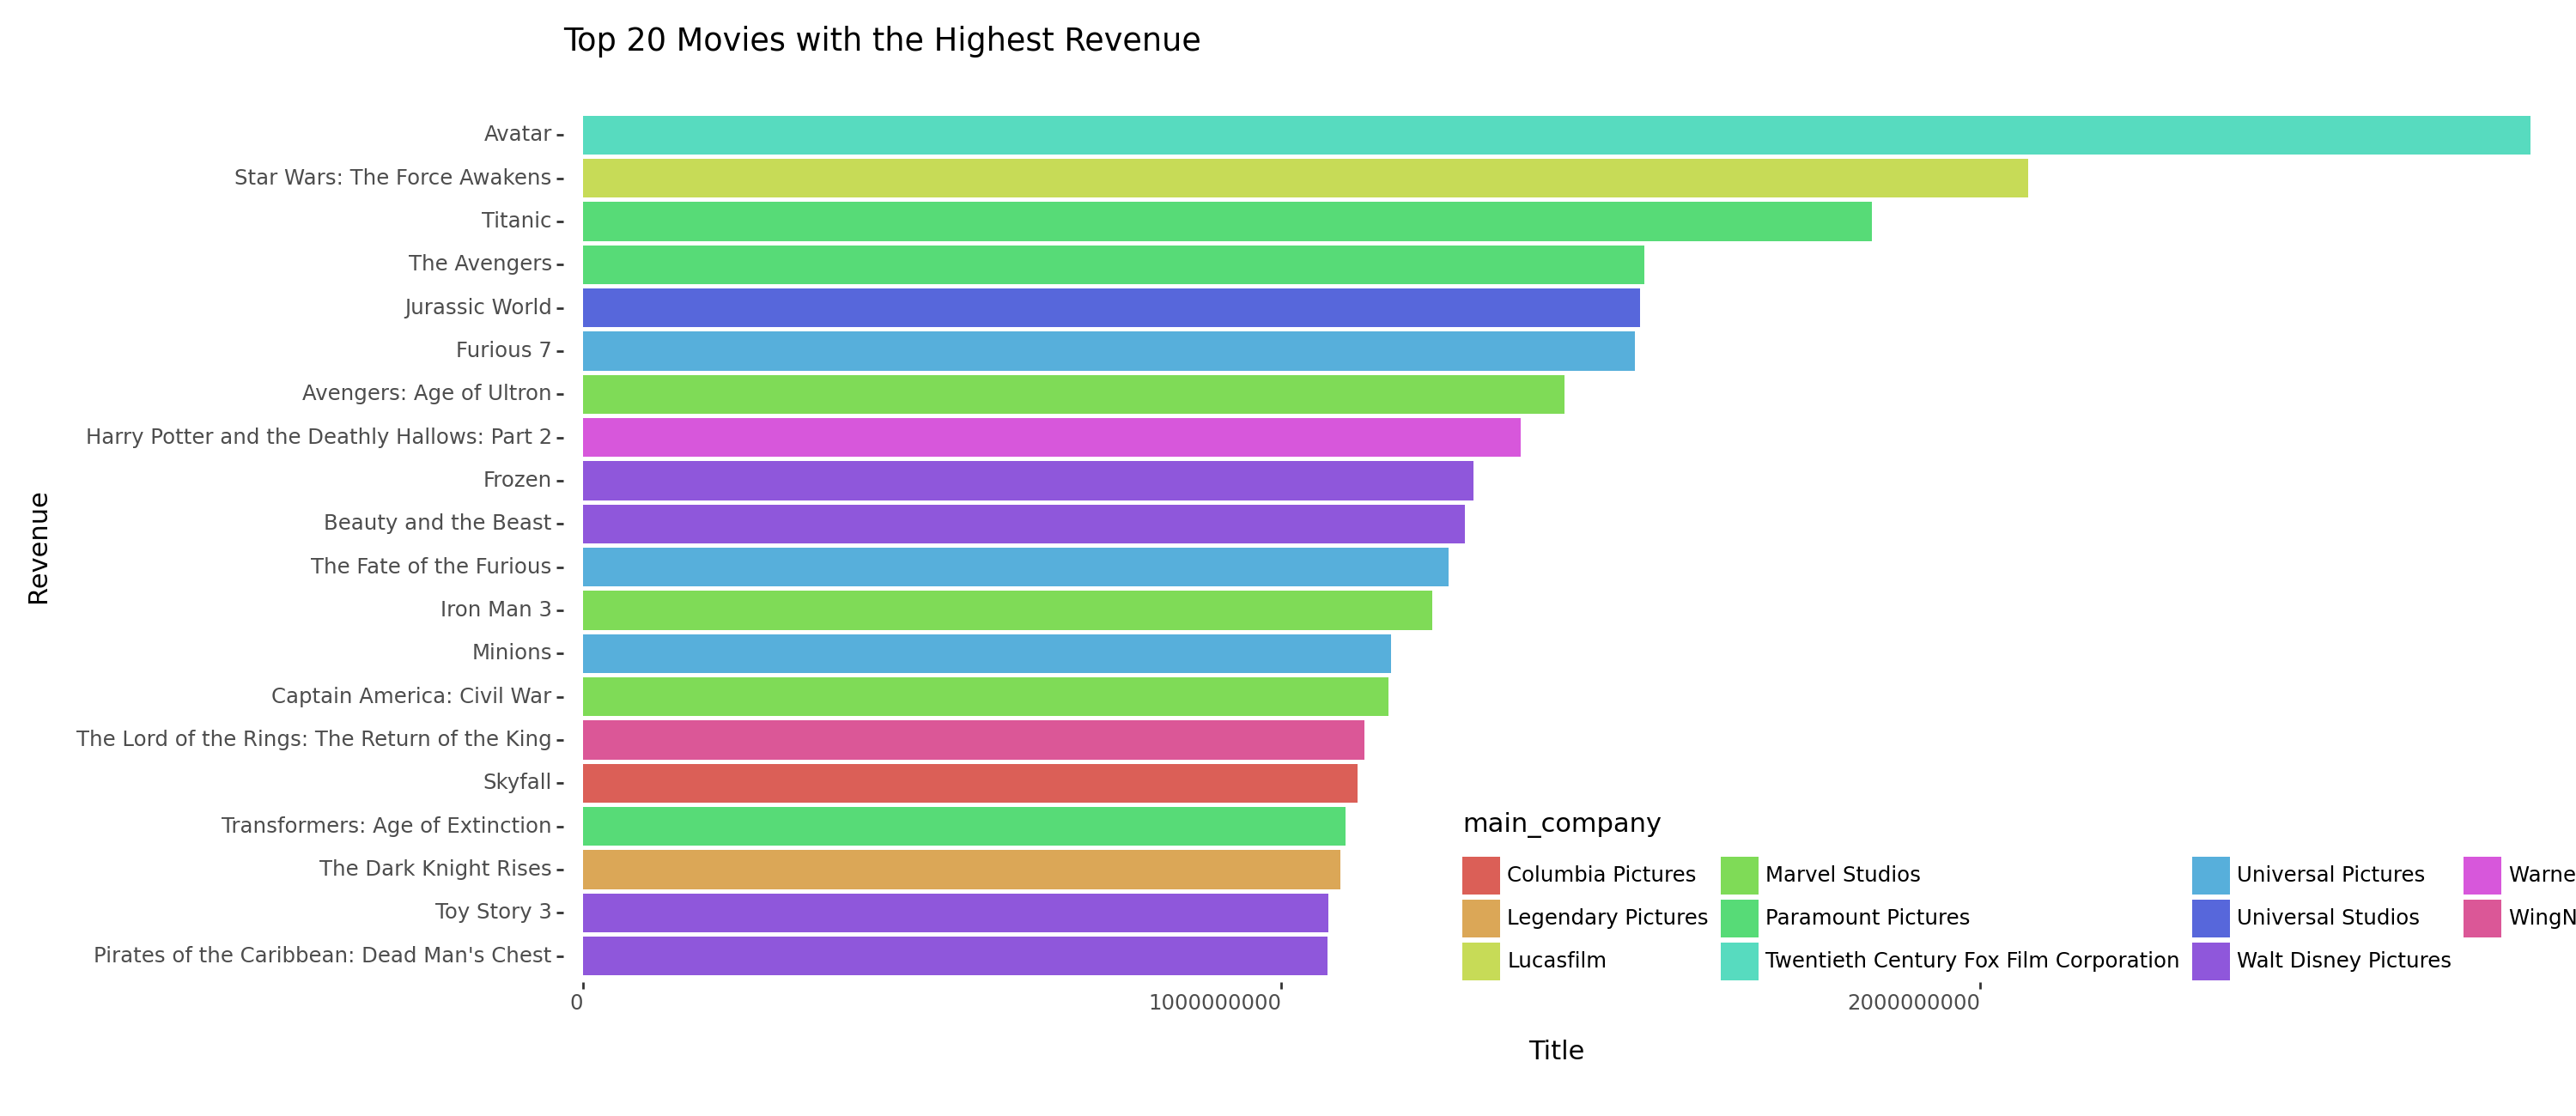

In [7]:
# Top 20 movies with the highest revenue vertical bar chart
df_top_20_revenue = df_main.sort_values(by="revenue", ascending=False).head(20)

p = (
    p9.ggplot(
        df_top_20_revenue,
        p9.aes("reorder(title, revenue)", "revenue", fill="main_company"),
    )
    + p9.geom_bar(stat="identity")
    + p9.coord_flip()
    + p9.theme(legend_position="none")
    + p9.scale_y_continuous(expand=(0.01, 0.01))
    + p9.labs(x="Revenue", y="Title", title="Top 20 Movies with the Highest Revenue")
    + p9.theme(
        axis_text_x=p9.element_text(rotation=0, hjust=1),
        figure_size=(15, 6.5),
        legend_position=(0.8, 0.2),
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#ffffff", size=0.5),
    )
    + p9.guides(color=p9.guide_legend(ncol=2))
)

p.draw()


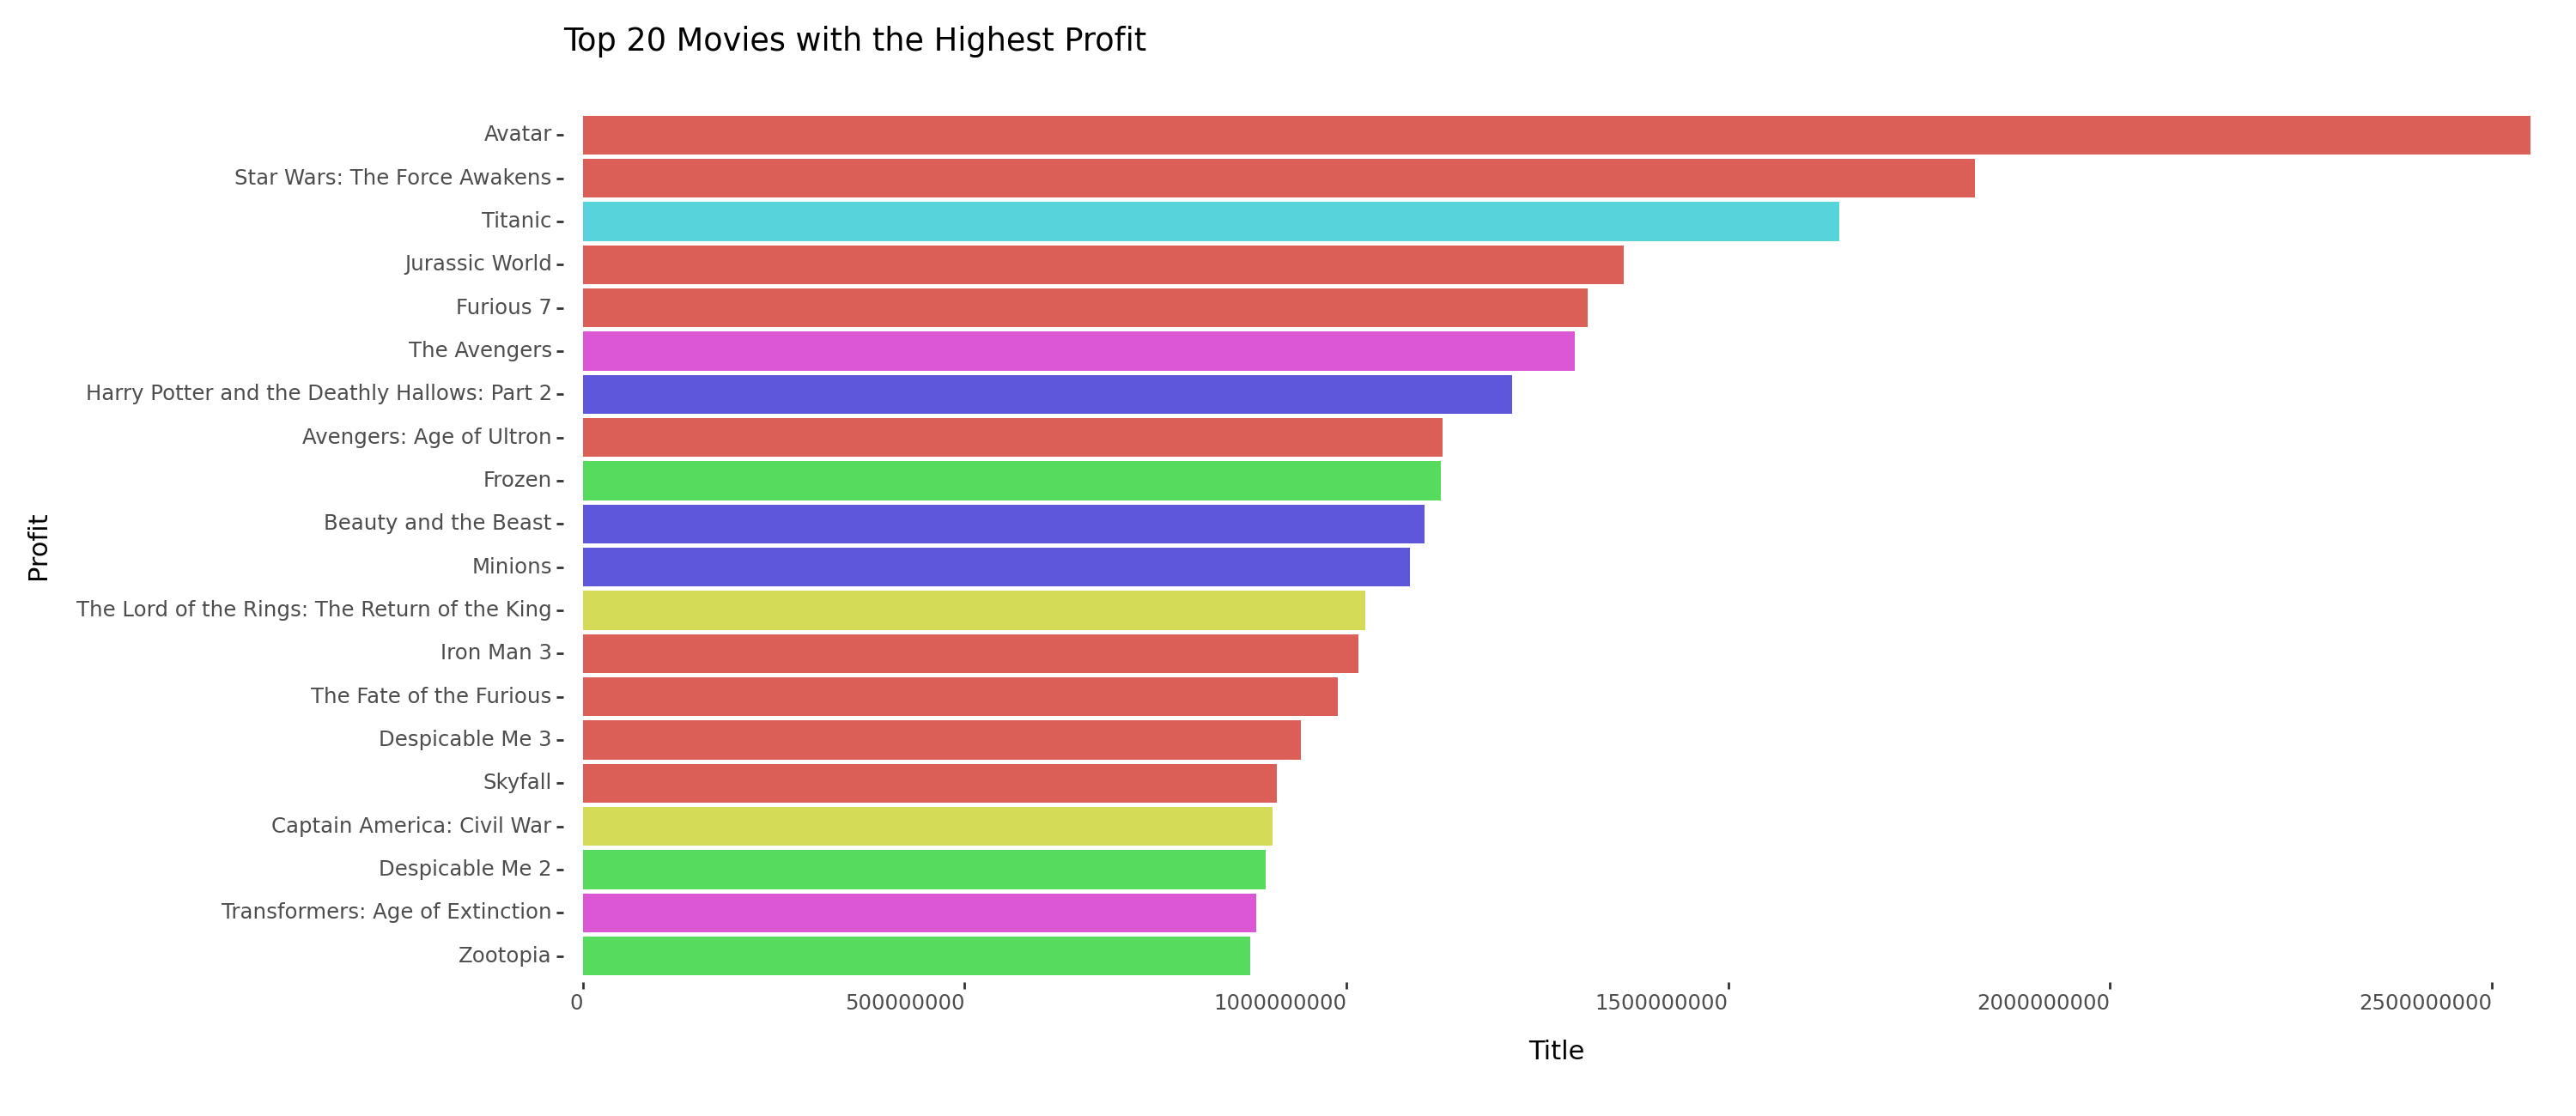

In [8]:
# Top 20 movies with the highest profit vertical bar chart
df_top_20_profit = df_main.copy()
df_top_20_profit["profit"] = df_top_20_profit["revenue"] - df_top_20_profit["budget"]
df_top_20_profit = df_top_20_profit.sort_values(by="profit", ascending=False).head(20)

p = (
    p9.ggplot(
        df_top_20_profit, p9.aes("reorder(title, profit)", "profit", fill="main_genre")
    )
    + p9.geom_bar(stat="identity")
    + p9.coord_flip()
    + p9.theme(legend_position="none")
    + p9.scale_y_continuous(expand=(0.01, 0.01))
    + p9.labs(x="Profit", y="Title", title="Top 20 Movies with the Highest Profit")
    + p9.theme(
        axis_text_x=p9.element_text(rotation=0, hjust=1),
        figure_size=(15, 6.5),
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#ffffff", size=0.5),
    )
    + p9.guides(color=p9.guide_legend(ncol=2))
)

p.draw()


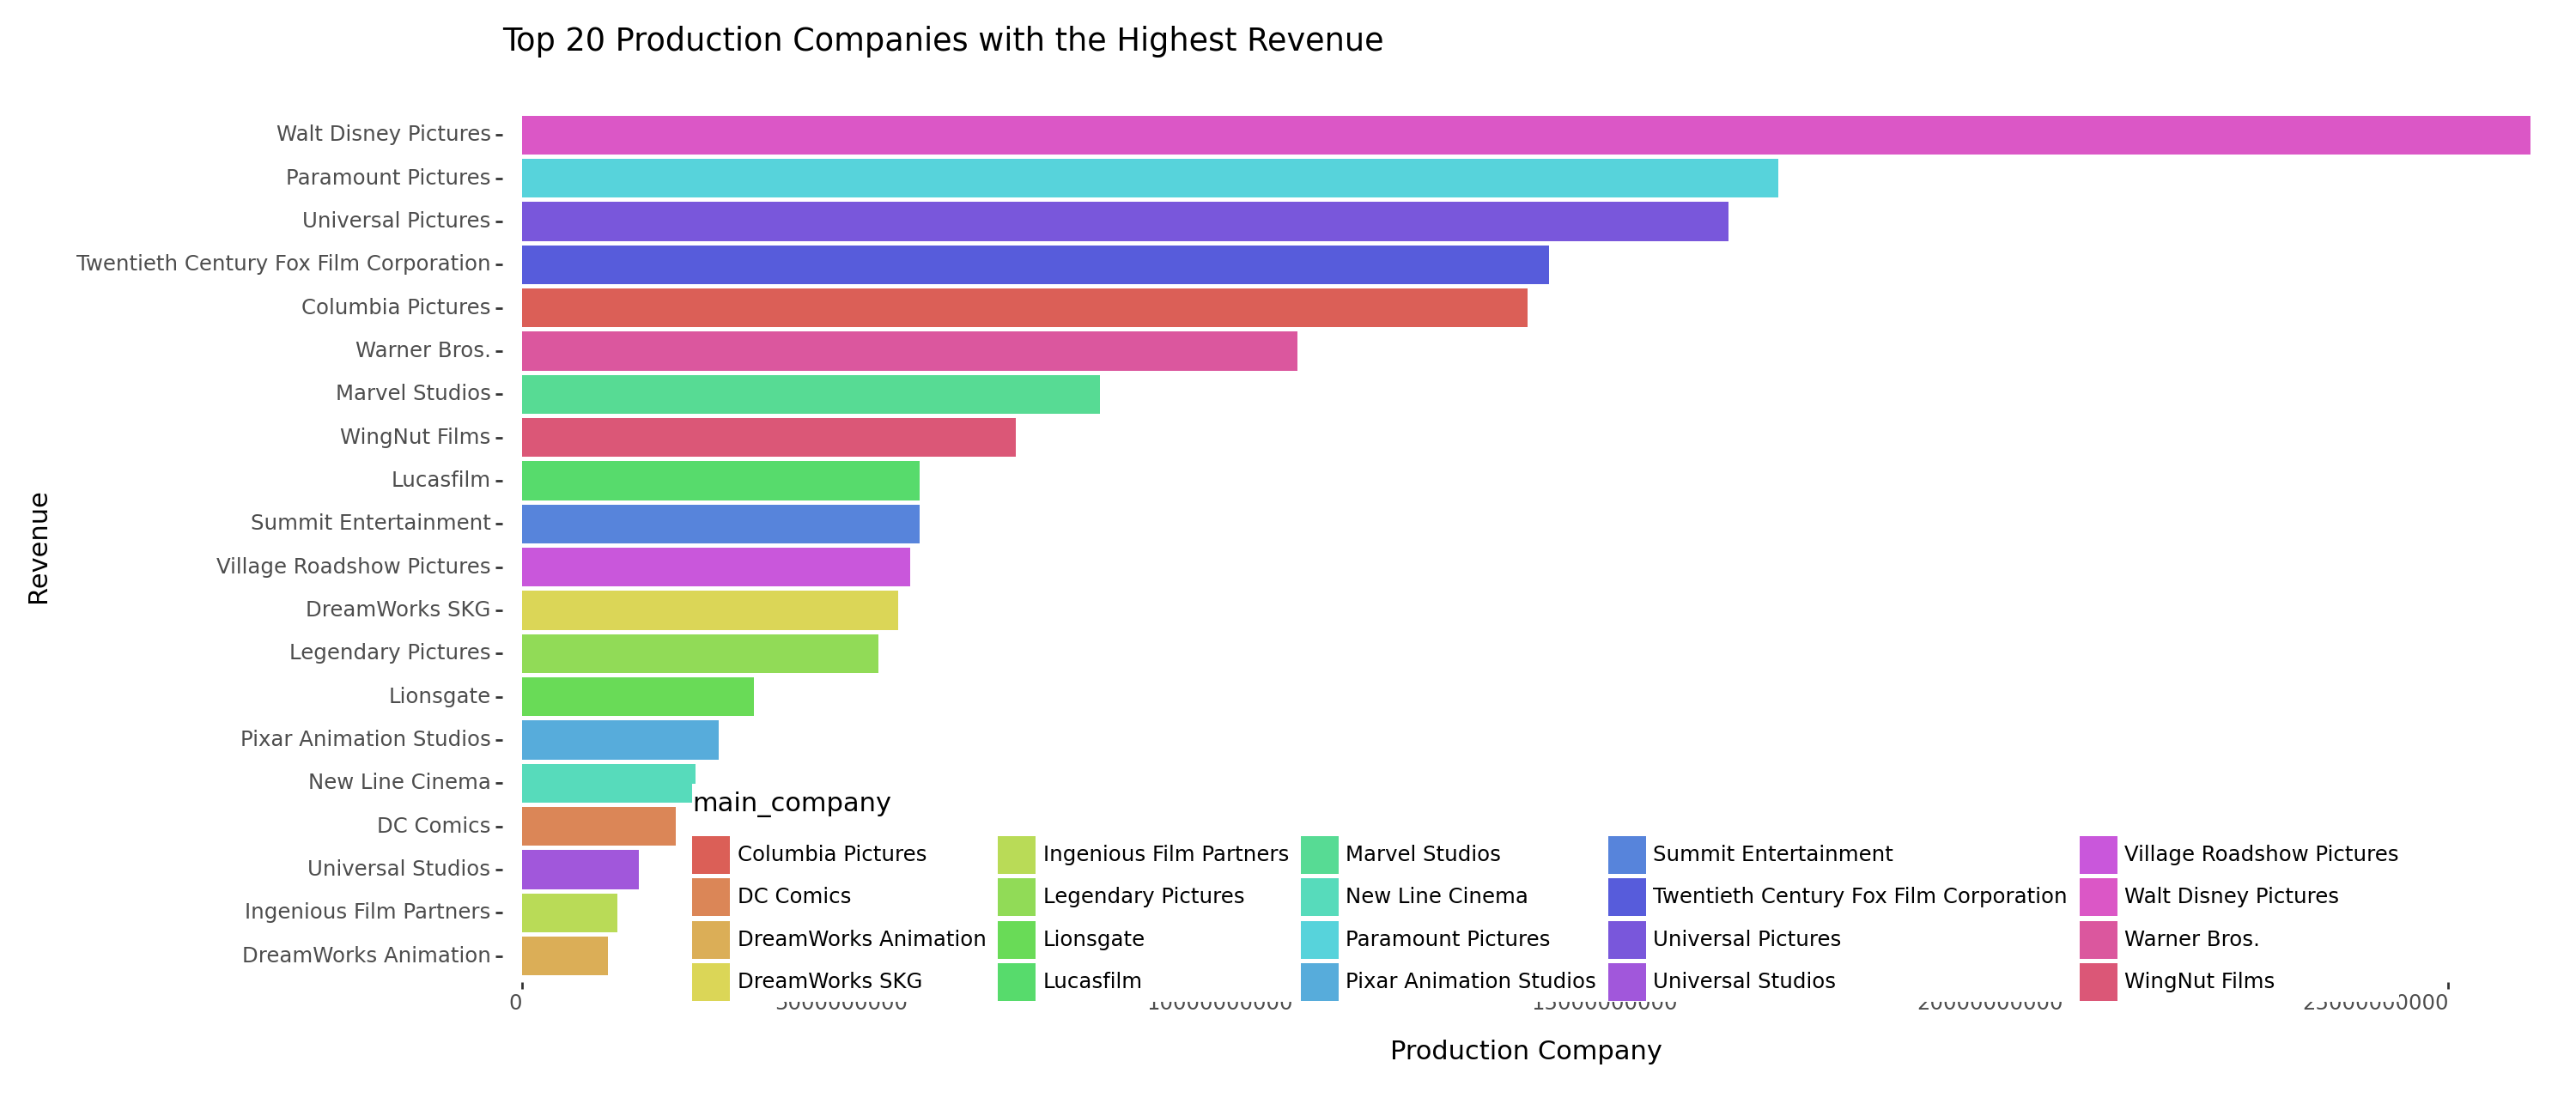

In [9]:
# Top 20 production companies with the highest revenue vertical bar chart
df_top_20_companies = df_main.groupby(["main_company"]).sum().reset_index()
df_top_20_companies = df_top_20_companies.sort_values(
    by="revenue", ascending=False
).head(20)


p = (
    p9.ggplot(
        df_top_20_companies,
        p9.aes("reorder(main_company, revenue)", "revenue", fill="main_company"),
    )
    + p9.geom_bar(stat="identity")
    + p9.coord_flip()
    + p9.theme(legend_position="none")
    + p9.scale_y_continuous(expand=(0.01, 0.01))
    + p9.labs(
        x="Revenue",
        y="Production Company",
        title="Top 20 Production Companies with the Highest Revenue",
    )
    + p9.theme(
        axis_text_x=p9.element_text(rotation=0, hjust=1),
        figure_size=(15, 6.5),
        legend_position=(0.6, 0.2),
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#ffffff", size=0.5),
    )
    + p9.guides(color=p9.guide_legend(ncol=2))
)

p.draw()


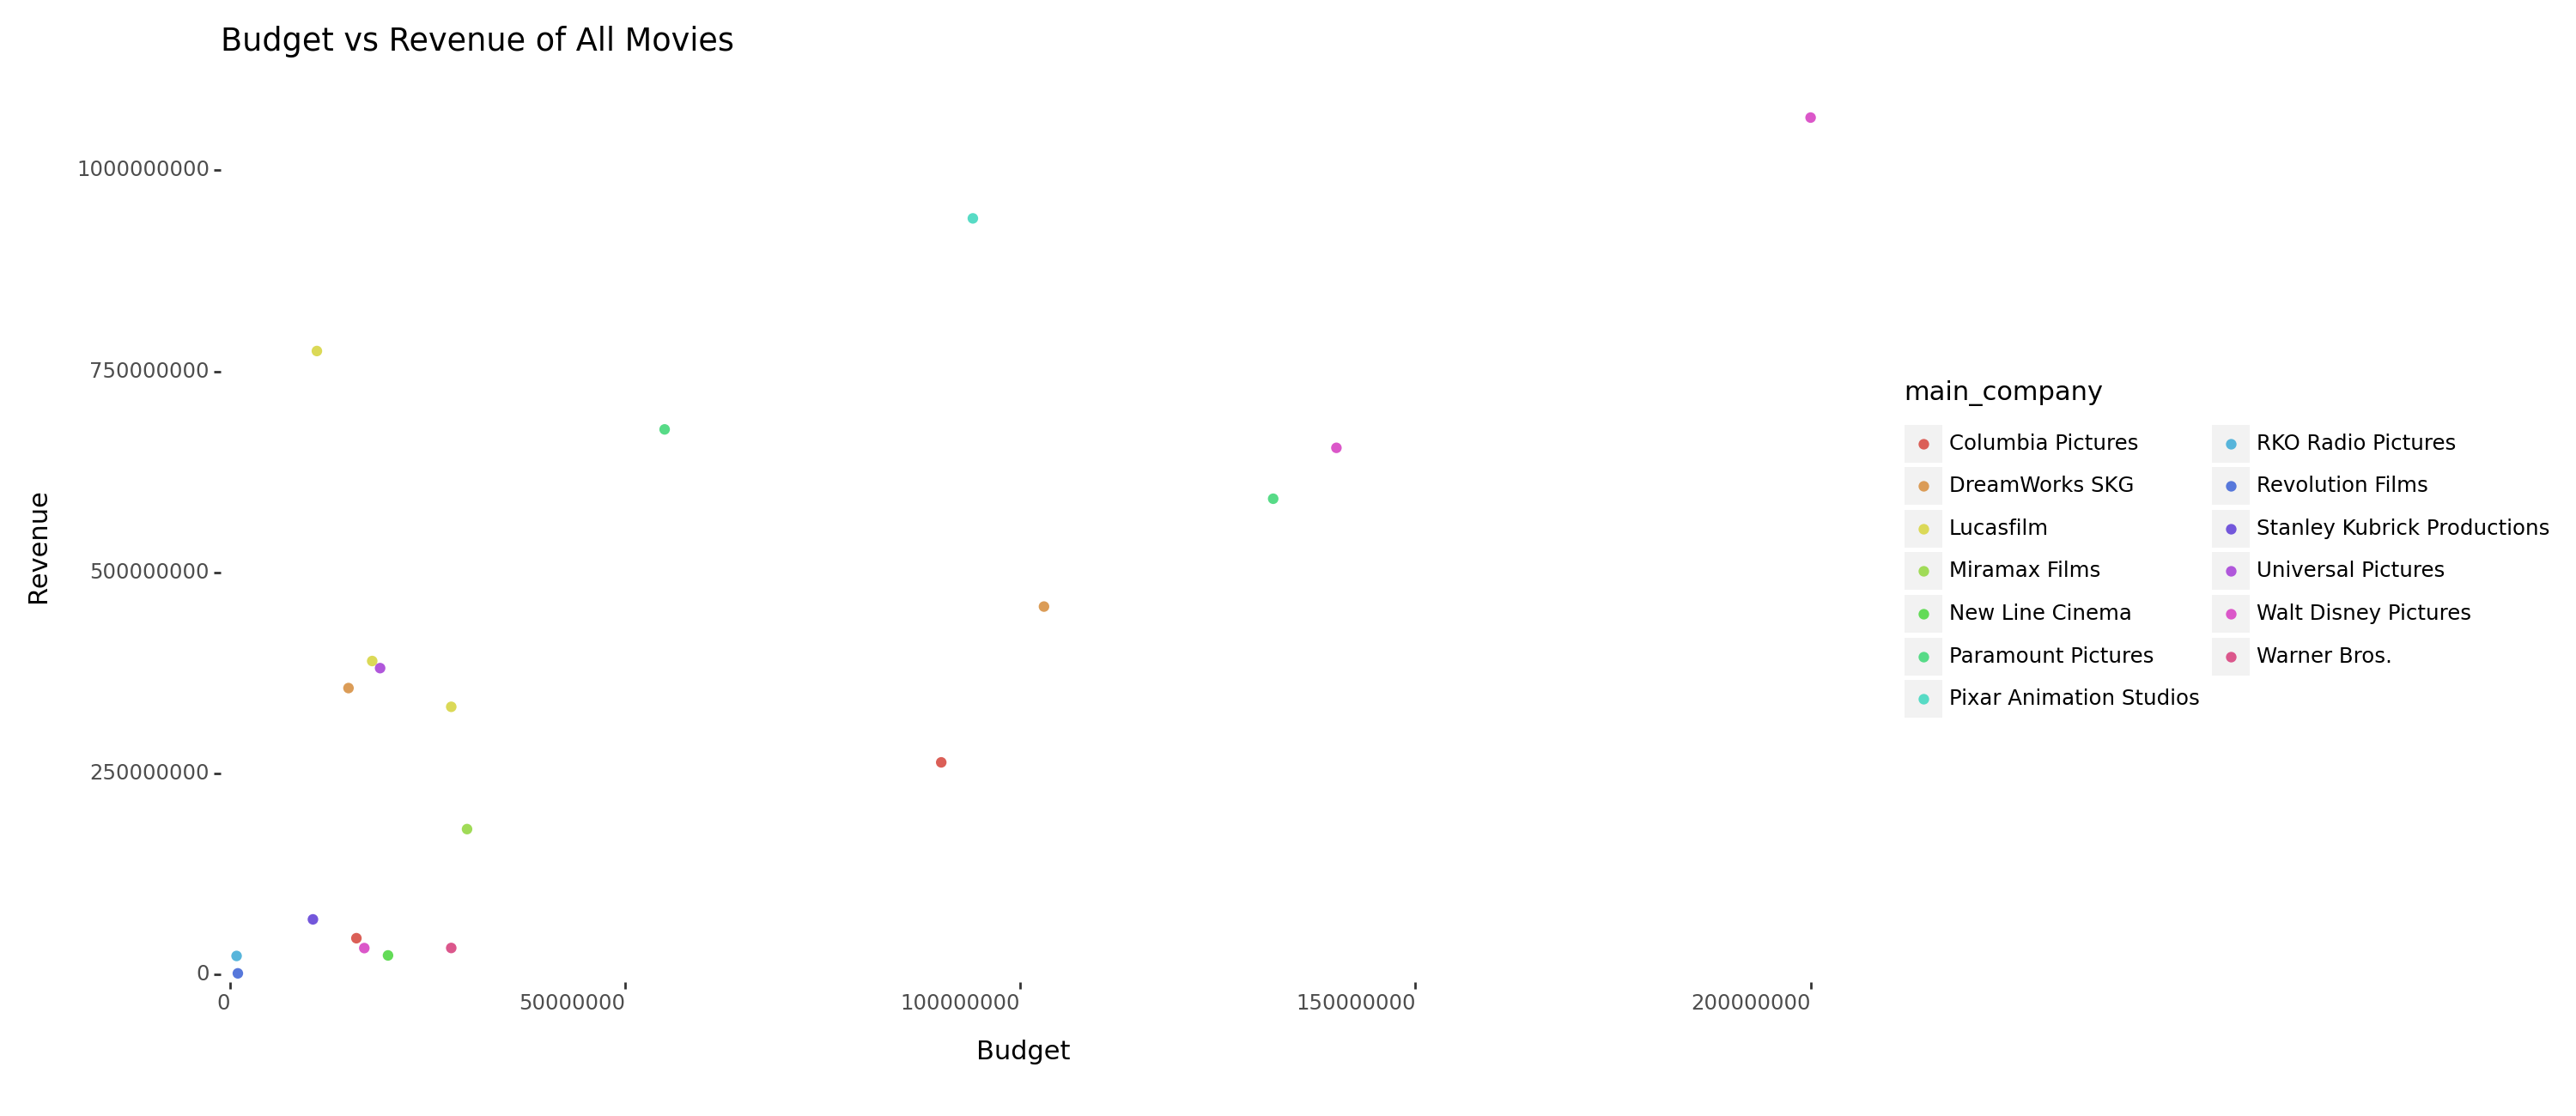

In [10]:
# Point plot of the budget vs revenue of the top 100 movies where the color of the point is the main company
df_budget_revenue = df_main[["title", "budget", "revenue", "main_company"]].head(20)

df_budget_revenue = df_budget_revenue.sort_values(by="revenue", ascending=False)

p = (
    p9.ggplot(df_budget_revenue, p9.aes("budget", "revenue", color="main_company"))
    + p9.geom_point()
    + p9.scale_x_continuous(expand=(0.01, 0.01))
    + p9.scale_y_continuous(expand=(0.01, 0.01))
    + p9.labs(x="Budget", y="Revenue", title="Budget vs Revenue of All Movies")
    + p9.theme(
        axis_text_x=p9.element_text(rotation=0, hjust=1),
        figure_size=(15, 6.5),
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#ffffff", size=0.5),
    )
    + p9.guides(color=p9.guide_legend(ncol=2))
)

p.draw()


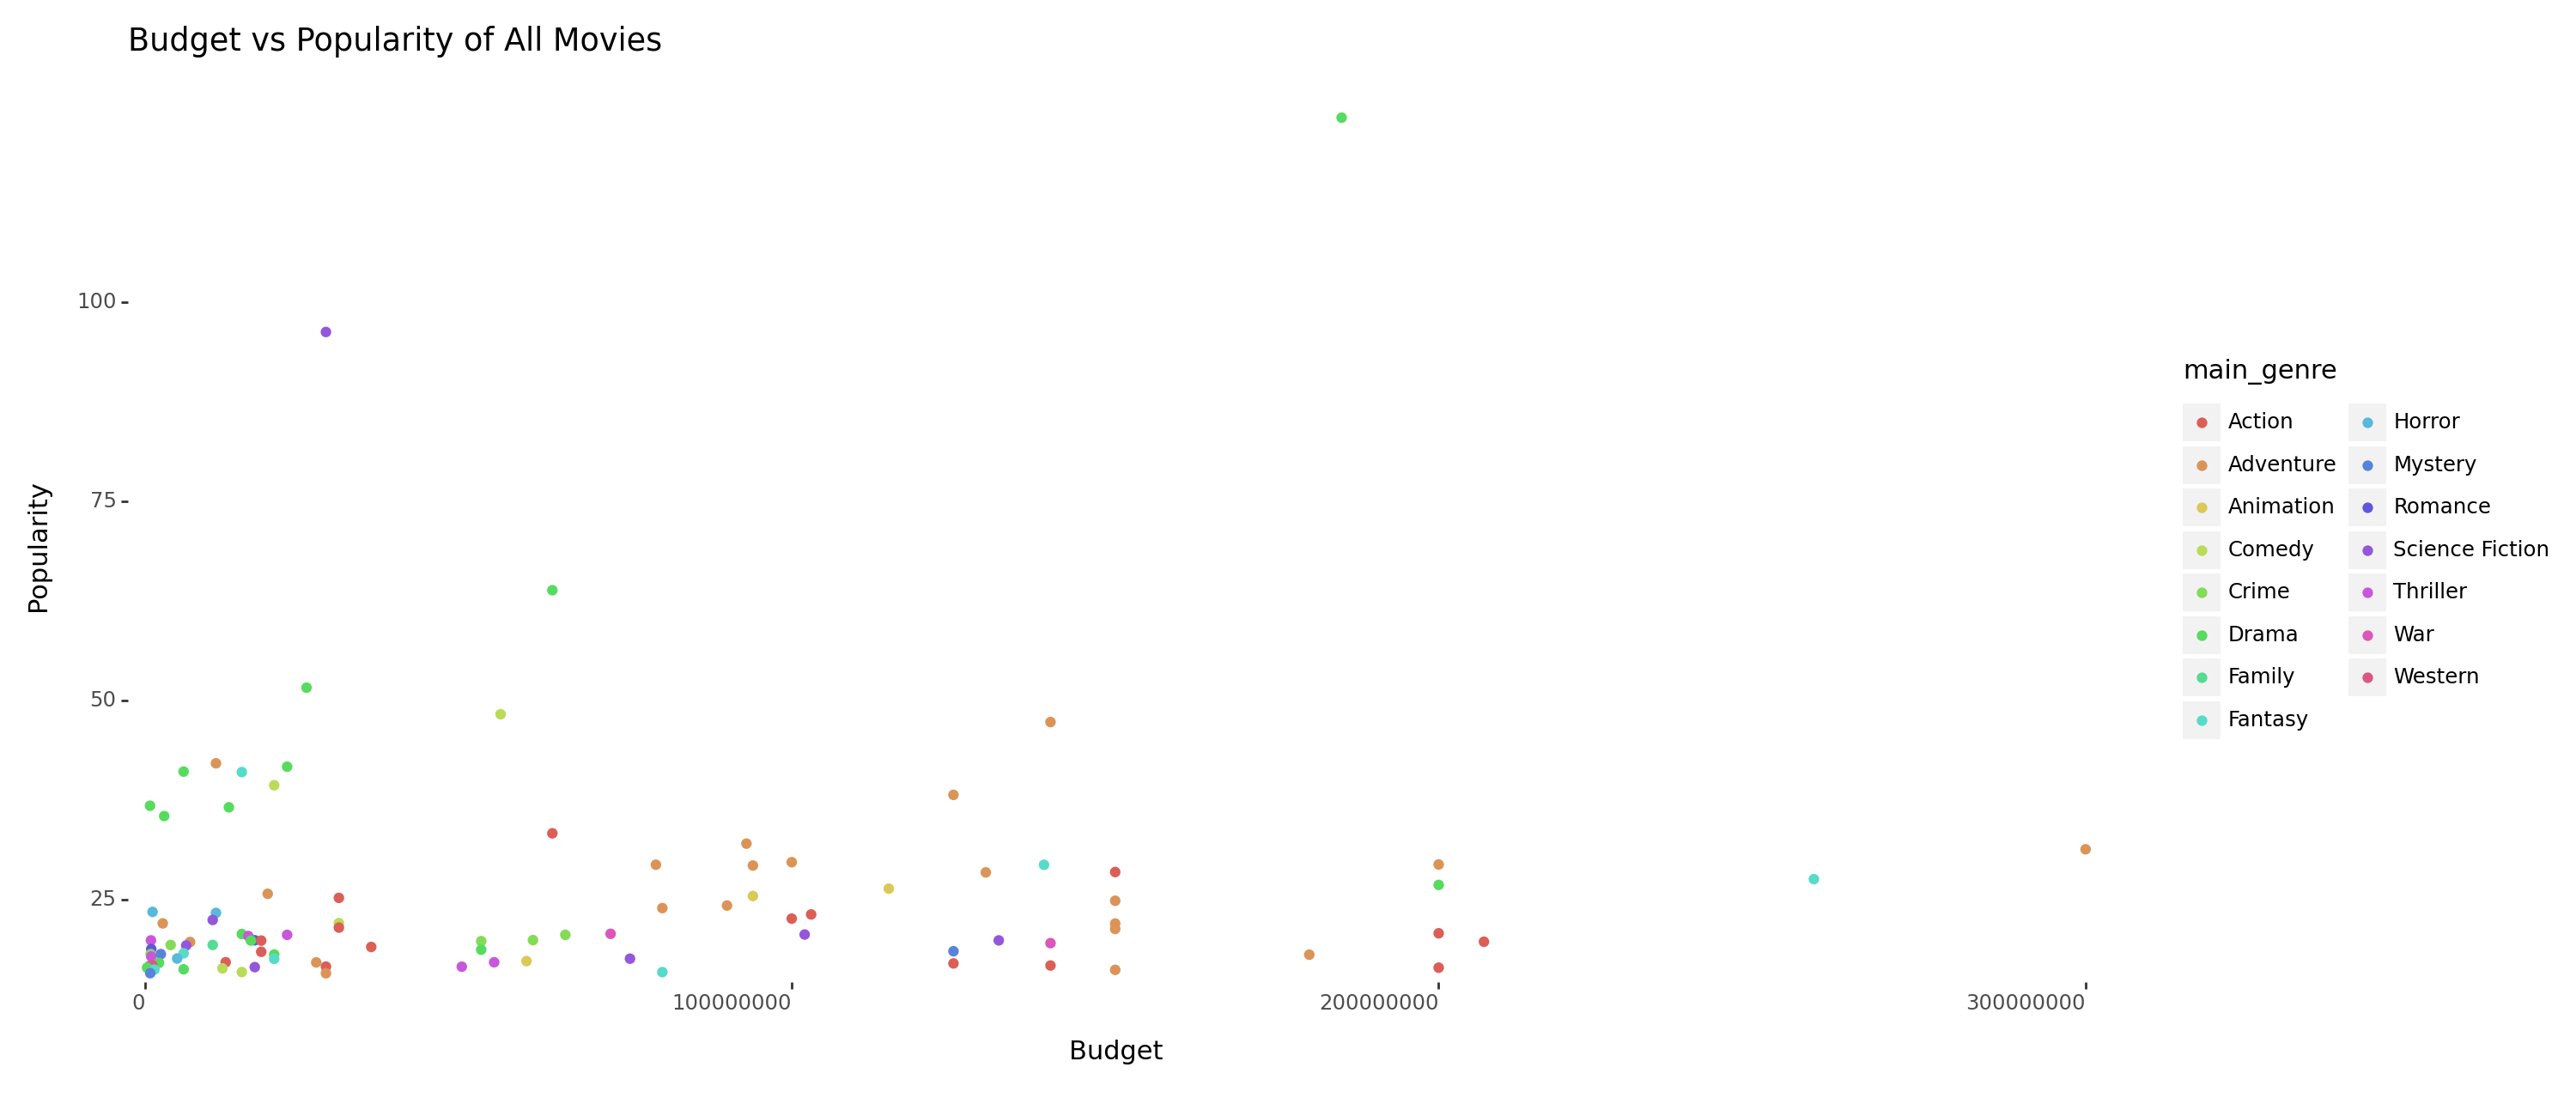

In [11]:
# Budget vs popularity of the top 100 movies where the color of the point is the main company
df_budget_popularity = df_main[["title", "budget", "popularity", "main_genre"]].head(
    100
)
df_budget_popularity = df_budget_popularity.sort_values(
    by="popularity", ascending=False
)

p = (
    p9.ggplot(df_budget_popularity, p9.aes("budget", "popularity", color="main_genre"))
    + p9.geom_point()
    + p9.scale_x_continuous(expand=(0.01, 0.01))
    + p9.scale_y_continuous(expand=(0.01, 0.01))
    + p9.labs(x="Budget", y="Popularity", title="Budget vs Popularity of All Movies")
    + p9.theme(
        axis_text_x=p9.element_text(rotation=0, hjust=1),
        figure_size=(15, 6.5),
        # legend_position='none',
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#ffffff", size=0.5),
    )
    + p9.guides(color=p9.guide_legend(ncol=2))
)

p.draw()


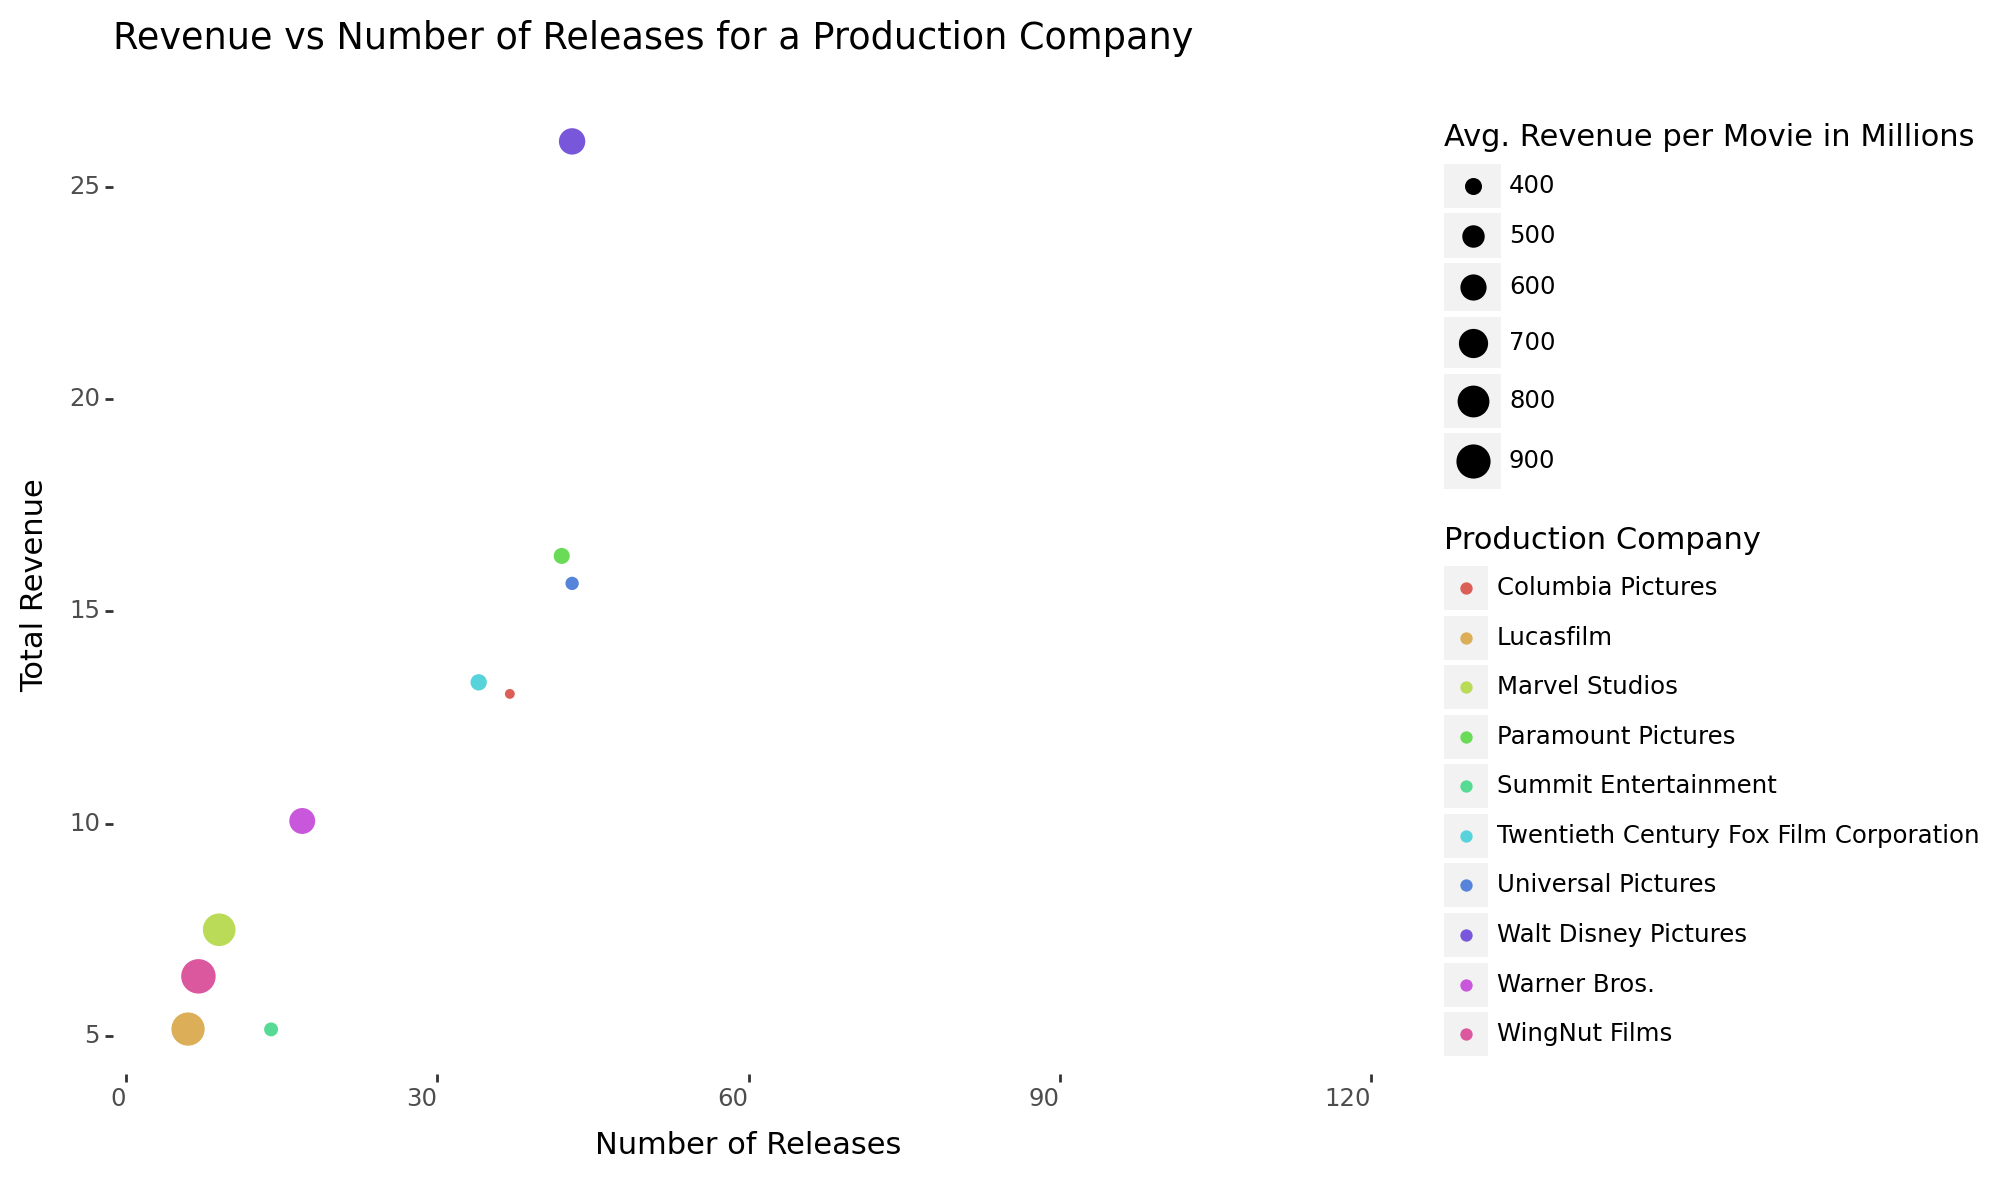

In [12]:
# Point chart for the total revenue vs number of releases for a production company
# X-axis is the number of releases and y-axis is the total revenue
# The size of the point is the average revenue per movie and the color of the point is the main_company
# We will only visualize the top 10 production companies with the highest revenue

df_top_10_companies = (
    df_main.groupby(["main_company"])
    .agg({"id": "count", "revenue": "sum"})
    .reset_index()
)
df_top_10_companies["movie_average"] = (
    df_top_10_companies["revenue"] / df_top_10_companies["id"]
)
df_top_10_companies = df_top_10_companies.sort_values(
    by="revenue", ascending=False
).head(10)
df_top_10_companies = df_top_10_companies.rename(columns={"id": "num_releases"})

# Convert $ to millions
df_top_10_companies["revenue"] = df_top_10_companies["revenue"] / 1_000_000_000
df_top_10_companies["movie_average"] = df_top_10_companies["movie_average"] / 1_000_000

p = (
    p9.ggplot(
        df_top_10_companies,
        p9.aes("num_releases", "revenue", size="movie_average", color="main_company"),
    )
    + p9.geom_point()
    + p9.labs(
        x="Number of Releases",
        y="Total Revenue",
        title="Revenue vs Number of Releases for a Production Company",
    )
    # X-scale should be from 0 to 120
    + p9.scale_x_continuous(expand=(0.01, 0.01), limits=(0, 120))
    + p9.theme(
        axis_text_x=p9.element_text(rotation=0, hjust=1),
        figure_size=(10, 6),
        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#ffffff", size=0.5),
    )
    + p9.guides(
        color=p9.guide_legend(
            title="Production Company",
        ),
        size=p9.guide_legend(
            title="Avg. Revenue per Movie in Millions",
        ),
    )
)

p.draw()


Top 10 most popular action movies:
                                         title  popularity
4782                              Wonder Woman  100.000000
5206                               Baby Driver   76.189152
4546                                  Deadpool   61.762705
4547            Guardians of the Galaxy Vol. 2   60.854324
3419                                    Avatar   60.760919
4453                                 John Wick   60.329795
5188  Captain Underpants: The First Epic Movie   26.102881
4434                           The Maze Runner   21.928766
5155                        Ghost in the Shell   18.979998
5145                                     Logan   13.900435
Total number of action movies: 102
Total number of non-profitable action movies: 4
Total number of profitable action movies: 98
Total number of action movies that made double their investment: 32
Total number of action movies that made quadruple their investment: 46


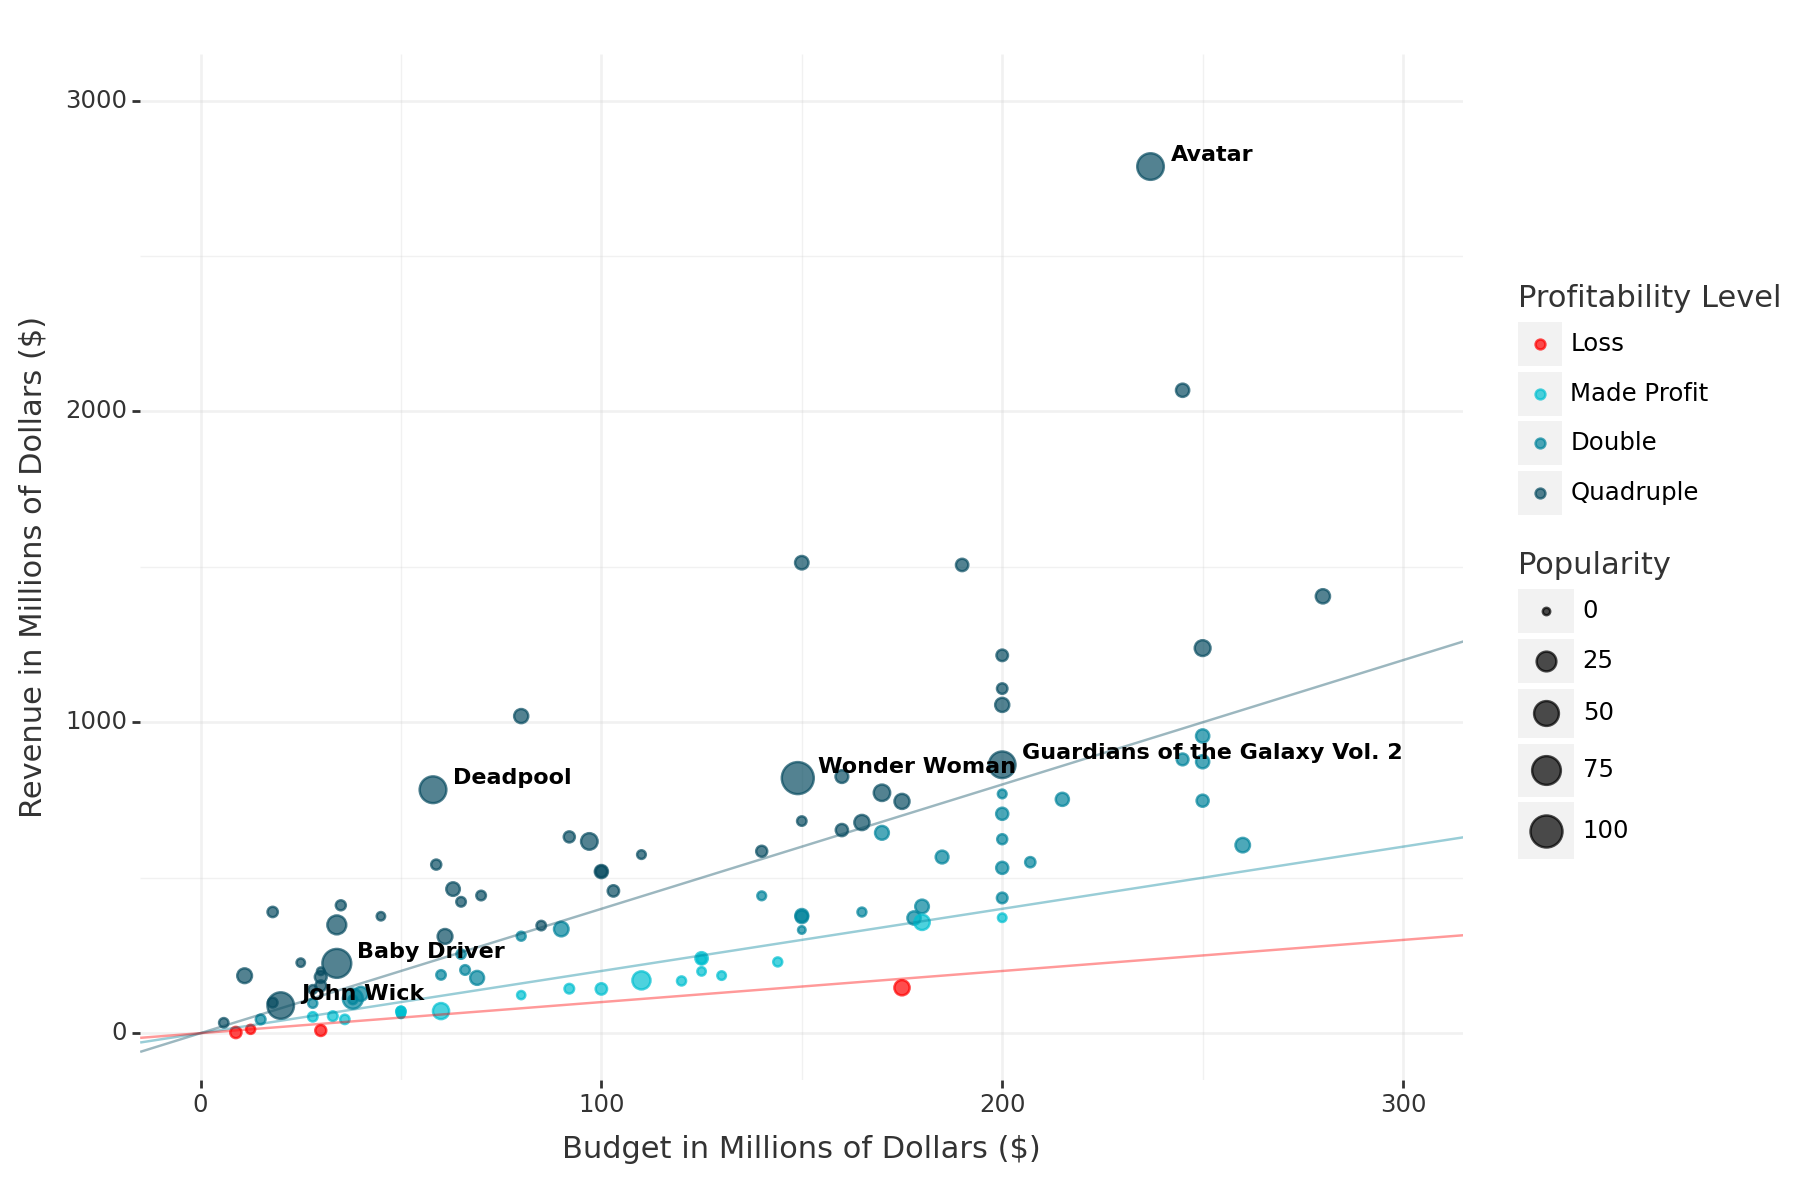

In [30]:
df_budgets = df_main[["title", "budget", "revenue", "main_genre", "release_year", "popularity"]].copy()

df_budgets["profit"] = df_budgets["revenue"] - df_budgets["budget"]
df_budgets["budget"] = df_budgets["budget"] / 1_000_000
df_budgets["revenue"] = df_budgets["revenue"] / 1_000_000
df_budgets["profit"] = df_budgets["profit"] / 1_000_000

df_budgets["budget"] = df_budgets["budget"].round(2)
df_budgets["revenue"] = df_budgets["revenue"].round(2)
df_budgets["profit"] = df_budgets["profit"].round(2)

df_budgets["made_profit"] = df_budgets["profit"] > 0
df_budgets["doubled_investment"] = df_budgets["revenue"] >= df_budgets["budget"] * 2
df_budgets["quadruple_investment"] = df_budgets["revenue"] >= df_budgets["budget"] * 4

df_budgets = df_budgets[df_budgets["main_genre"] == "Action"]
# The profitability level is based on the revenue to budget ratio
df_budgets["profitability_level"] = df_budgets["revenue"] / df_budgets["budget"]
df_budgets["profitability_level"] = df_budgets["profitability_level"].apply(
    lambda x: "Quadruple"
    if x >= 4
    else "Double"
    if x >= 2
    else "Made Profit"
    if x >= 1
    else "Loss"
)

# make the profitability level categorical
df_budgets["profitability_level"] = pd.Categorical(
    df_budgets["profitability_level"],
    categories=["Loss", "Made Profit", "Double", "Quadruple"],
    ordered=True,
)
df_non_profitable = df_budgets[df_budgets["made_profit"] == False]

total_count = len(df_budgets)
total_profitable_count = len(df_budgets[df_budgets["made_profit"] == True])
total_non_profitable_count = len(df_budgets[df_budgets["made_profit"] == False])
total_quadruple_count = len(df_budgets[df_budgets["quadruple_investment"] == True])
total_doubled_count = len(df_budgets[df_budgets["doubled_investment"] == True])
total_doubled_count = total_doubled_count - total_quadruple_count

def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

# Map the popularity range to 1-10
df_budgets["popularity"] = df_budgets["popularity"].apply(
    lambda x: translate(x, df_budgets["popularity"].min(), df_budgets["popularity"].max(), 0, 100)
)

# Print the top 10 most popular movies
top_10_most_popular = df_budgets.sort_values(by="popularity", ascending=False).head(10)
print("Top 10 most popular action movies:")
print(top_10_most_popular[["title", "popularity"]])


# Let's print out a simple report
print("Total number of action movies:", total_count)
print("Total number of non-profitable action movies:", total_non_profitable_count)
print("Total number of profitable action movies:", total_profitable_count)
print("Total number of action movies that made double their investment:", total_doubled_count)
print("Total number of action movies that made quadruple their investment:", total_quadruple_count)

p = (
    #  color everything in gray first
    p9.ggplot(df_budgets, p9.aes(x="budget", y="revenue", size="popularity", color="profitability_level"))
    + p9.geom_point(
        data=df_budgets,
        alpha=0.7,
    )

    + p9.labs(
        x="Budget in Millions of Dollars ($)",
        y="Revenue in Millions of Dollars ($)",
    )

    + p9.geom_abline(intercept=0, slope=4, color="#084c61", alpha=0.4)
    + p9.geom_abline(intercept=0, slope=2, color="#00839b", alpha=0.4)
    + p9.geom_abline(intercept=0, slope=1, color="red", alpha=0.4)
    + p9.scale_color_manual(
        values={
            "Loss": "red",
            "Made Profit": "#00bfd0",
            "Double": "#00839b",
            "Quadruple": "#084c61",
        }
    )

    + p9.geom_text(
        p9.aes(label="title"),
        data=df_budgets.sort_values(by="popularity", ascending=False).head(6),
        fontweight="bold",
        color="black",
        ha="left",
        va="bottom",
        size=8,
        nudge_x=5,
        nudge_y=5,
    )

    + p9.scale_x_continuous(expand=(0.05, 0.05), limits=(0, 300))
    + p9.scale_y_continuous(expand=(0.05, 0.05), limits=(0, 3000))
    + p9.guides(
        color=p9.guide_legend(
            title="Profitability Level",
            # Order of the entries in the following order: Loss, Made Profit, Double, Quadruple
            # This is to ensure that the colors match the geom_point

        ),
        size=p9.guide_legend(
            title="Popularity",

        ),
    )
    + p9.theme(
        figure_size=(9, 6),
        panel_grid=p9.element_line(color="lightgray", alpha=0.3),
        panel_background=p9.element_rect(fill="white"),
        axis_text=p9.element_text(
            color="black",
            alpha=0.8,
        ),
        axis_title=p9.element_text(
            color="black",
            # size=12,
            alpha=0.8,
        ),
        legend_title=p9.element_text(
            color="black",
            # size=10,
            alpha=0.8,
        ),
    )
)

p.draw()


In [14]:
# Title, Budget, Revenue and Profit of the 10 most popular action movies from df_budgets
df_action_most_popular = df_budgets.sort_values(by="popularity", ascending=False).head(
    10
)
df_action_most_popular = df_action_most_popular[
    ["title", "budget", "revenue", "profit"]
]
df_action_most_popular["roi (%)"] = df_action_most_popular["profit"] / df_action_most_popular["budget"] * 100
df_action_most_popular["roi (%)"] = df_action_most_popular["roi (%)"].round(2)
df_action_most_popular


,title,budget,revenue,profit,roi (%)
4782,Wonder Woman,149.0,820.58,671.58,450.72
5206,Baby Driver,34.0,224.51,190.51,560.32
4546,Deadpool,58.0,783.11,725.11,1250.19
4547,Guardians of the Galaxy Vol. 2,200.0,863.42,663.42,331.71
3419,Avatar,237.0,2787.97,2550.97,1076.36
4453,John Wick,20.0,88.76,68.76,343.80
5188,Captain Underpants: The First Epic Movie,38.0,110.82,72.82,191.63
4434,The Maze Runner,34.0,348.32,314.32,924.47
5155,Ghost in the Shell,110.0,169.80,59.80,54.36
5145,Logan,97.0,616.80,519.80,535.88


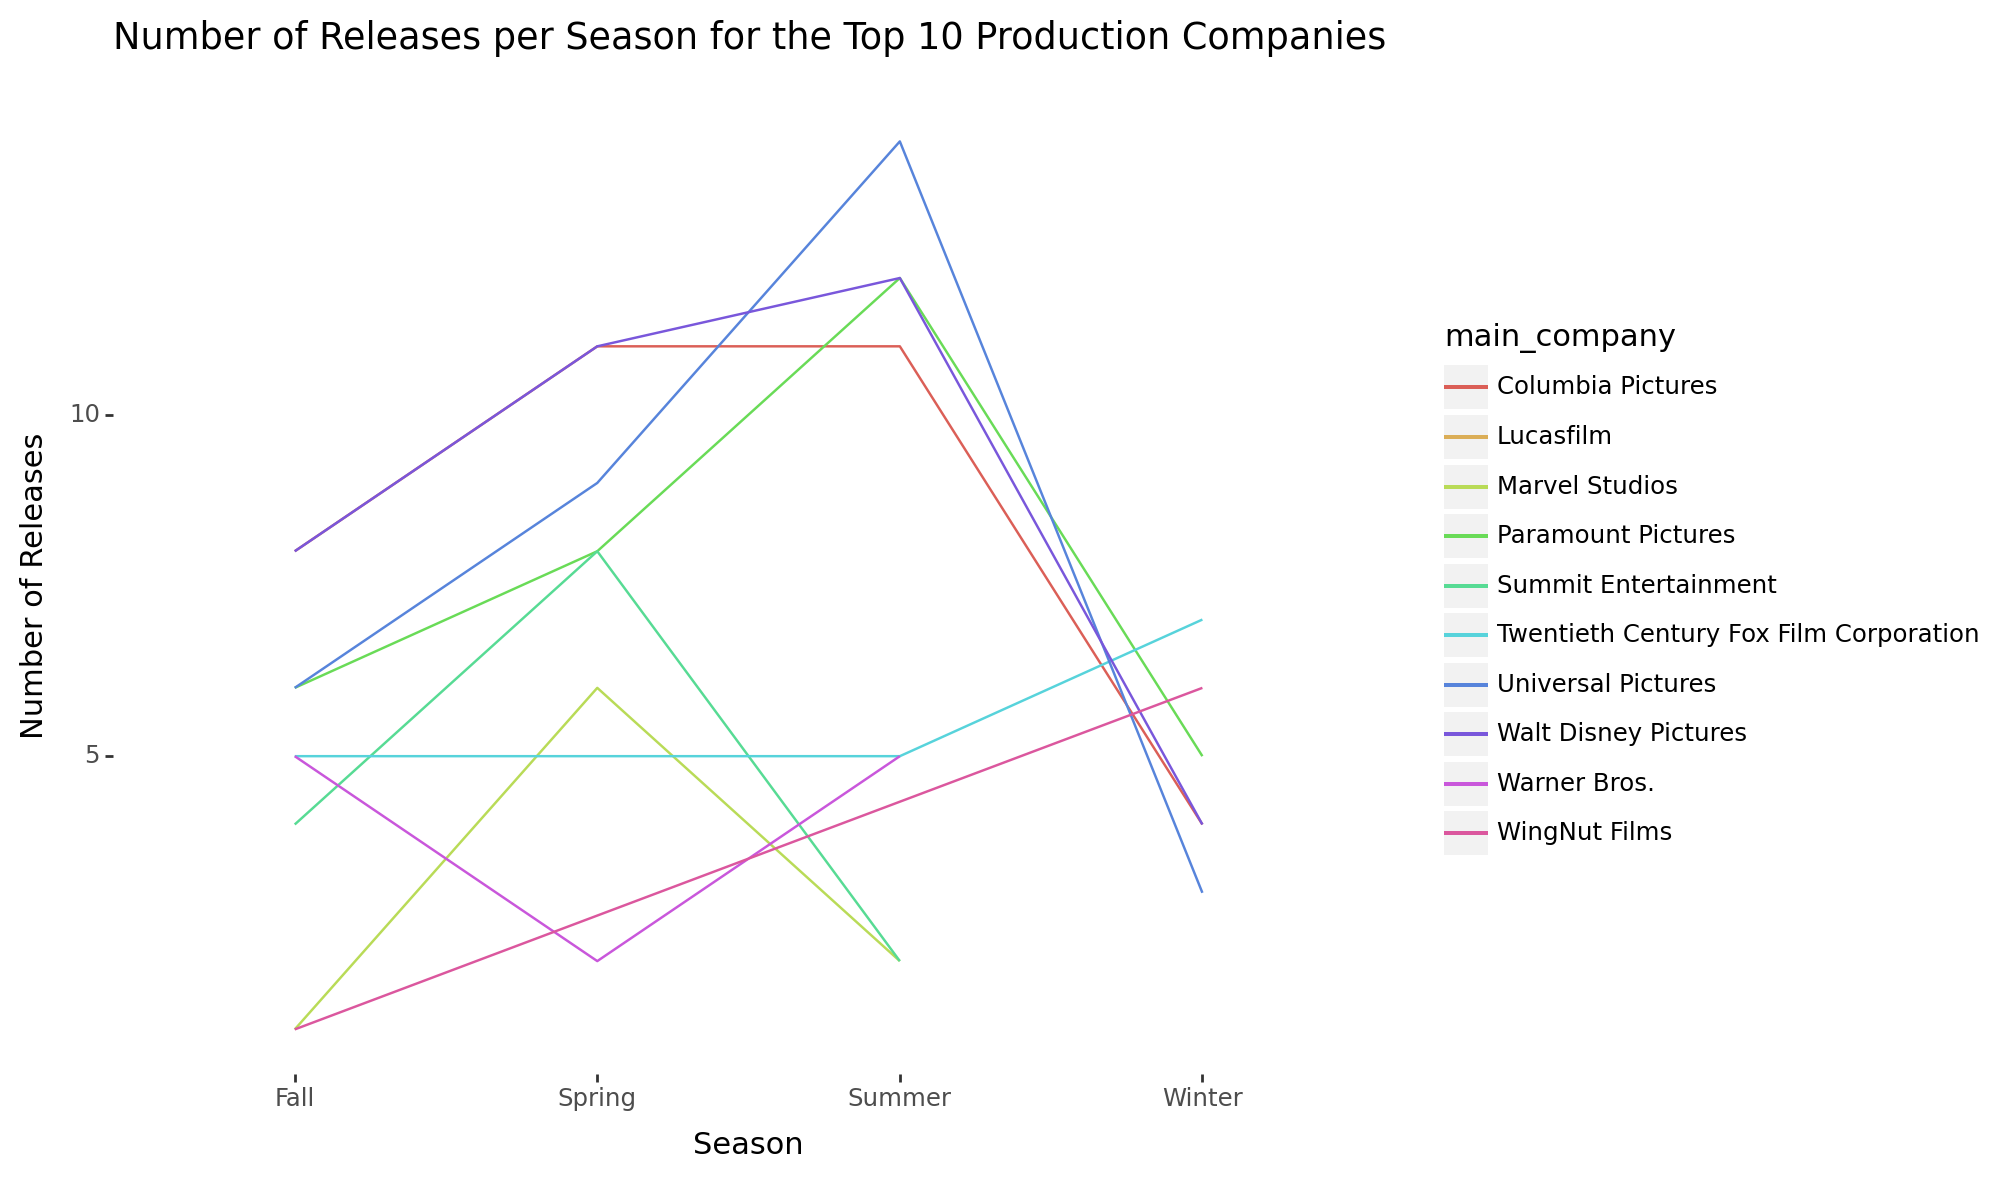

In [15]:
# Line chart of the number of releases per year-season (4 seasons) for the top 10 production companies with the highest revenue
# X-axis is the year-season and y-axis is the number of releases
# The color of the line is the production company
# We will only visualize the top 10 production companies with the highest revenue
df_top_10_companies = (
    df_main.groupby(["main_company"])
    .agg({"id": "count", "revenue": "sum"})
    .reset_index()
)
df_top_10_companies = df_top_10_companies.sort_values(
    by="revenue", ascending=False
).head(10)
df_filtered_movies = df_main[df_main["main_company"].isin(df_top_10_companies["main_company"])]
# only after 2000
df_filtered_movies = df_filtered_movies[df_filtered_movies["release_year"] >= 2000]
df_filtered_movies = df_filtered_movies.groupby(["season", "main_company"]).agg({"id": "count"}).reset_index()
df_filtered_movies = df_filtered_movies.rename(columns={"id": "num_releases"})
df_filtered_movies = df_filtered_movies.sort_values(by="season", ascending=True)

df_filtered_movies

p = (
    p9.ggplot(
        df_filtered_movies,
        p9.aes("season", "num_releases", color="main_company", group="main_company"),
    )
    + p9.geom_line()
    + p9.labs(
        x="Season",
        y="Number of Releases",
        title="Number of Releases per Season for the Top 10 Production Companies",
    )
    # + p9.scale_x_discrete(limits=["winter", "spring", "summer", "fall"])
    + p9.theme(
        figure_size=(10, 6),

        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#ffffff", size=0.5),
    )
)

p.draw()


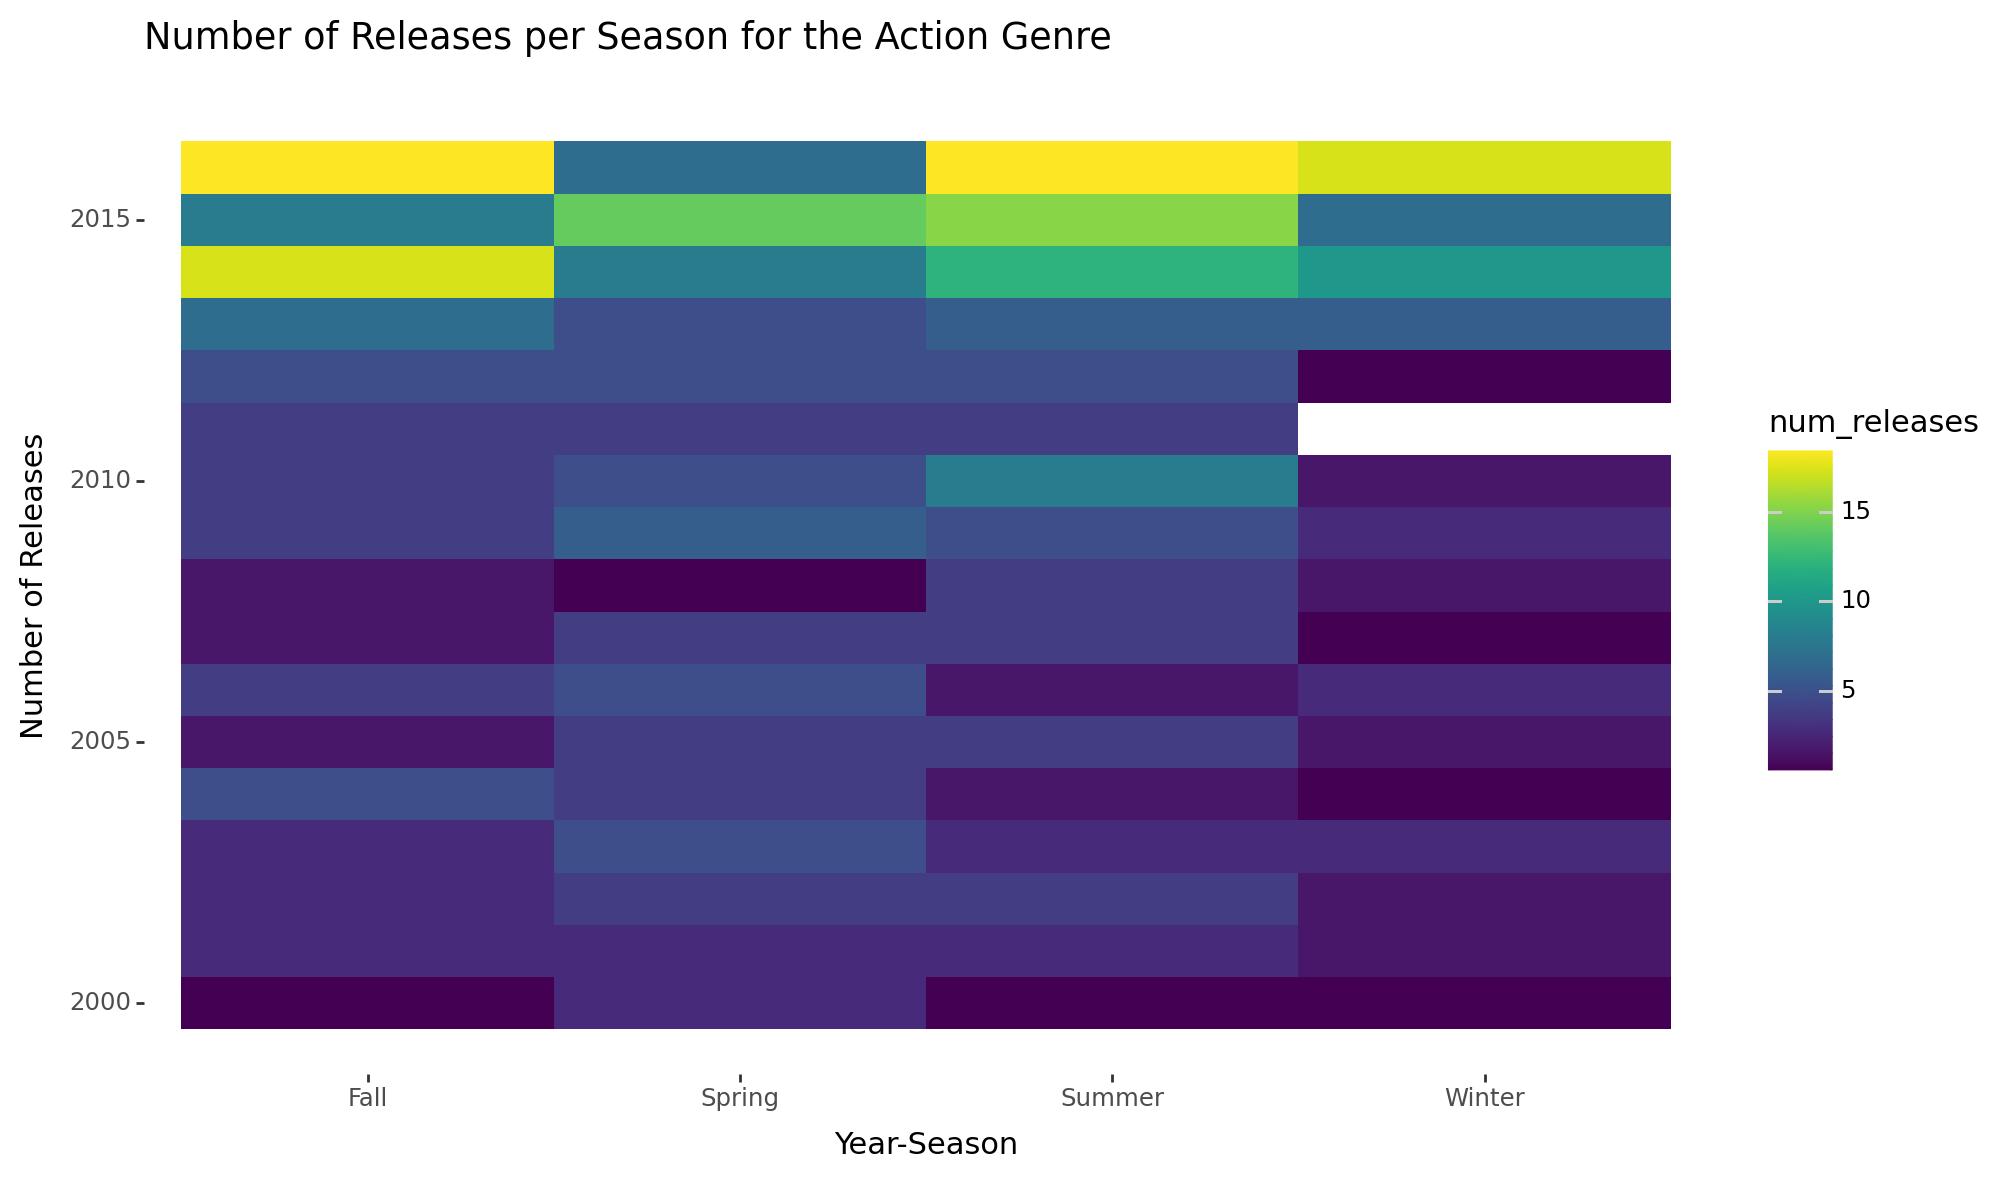

In [16]:
# Heat map of the number of releases per season (4 seasons) for every year in 2000-2016
# for all the genres
# X-axis is the year-season pair and y-axis is the number of releases
# The color of the line is the movie genre

df_filtered_movies = df_main[df_main["release_year"] >= 2000]
df_filtered_movies = df_filtered_movies[df_filtered_movies["release_year"] <= 2016]
df_filtered_movies = df_filtered_movies.groupby(["season", "release_year"]).agg({"id": "count"}).reset_index()
df_filtered_movies = df_filtered_movies.rename(columns={"id": "num_releases"})
df_filtered_movies = df_filtered_movies.sort_values(by=["release_year", "season"], ascending=True)
df_filtered_movies["label"] = df_filtered_movies["release_year"].astype(str) + "-" + df_filtered_movies["season"]
p = (
    p9.ggplot(
        df_filtered_movies,
        p9.aes("season", "release_year", fill="num_releases"),
    )
    + p9.geom_tile()
    + p9.labs(
        x="Year-Season",
        y="Number of Releases",
        title="Number of Releases per Season for the Action Genre",
    )
    + p9.theme(
        figure_size=(10, 6),

        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#ffffff", size=0.5),
    )
)

p.draw()


Index(['season', 'release_year', 'num_releases', 'label'], dtype='object')


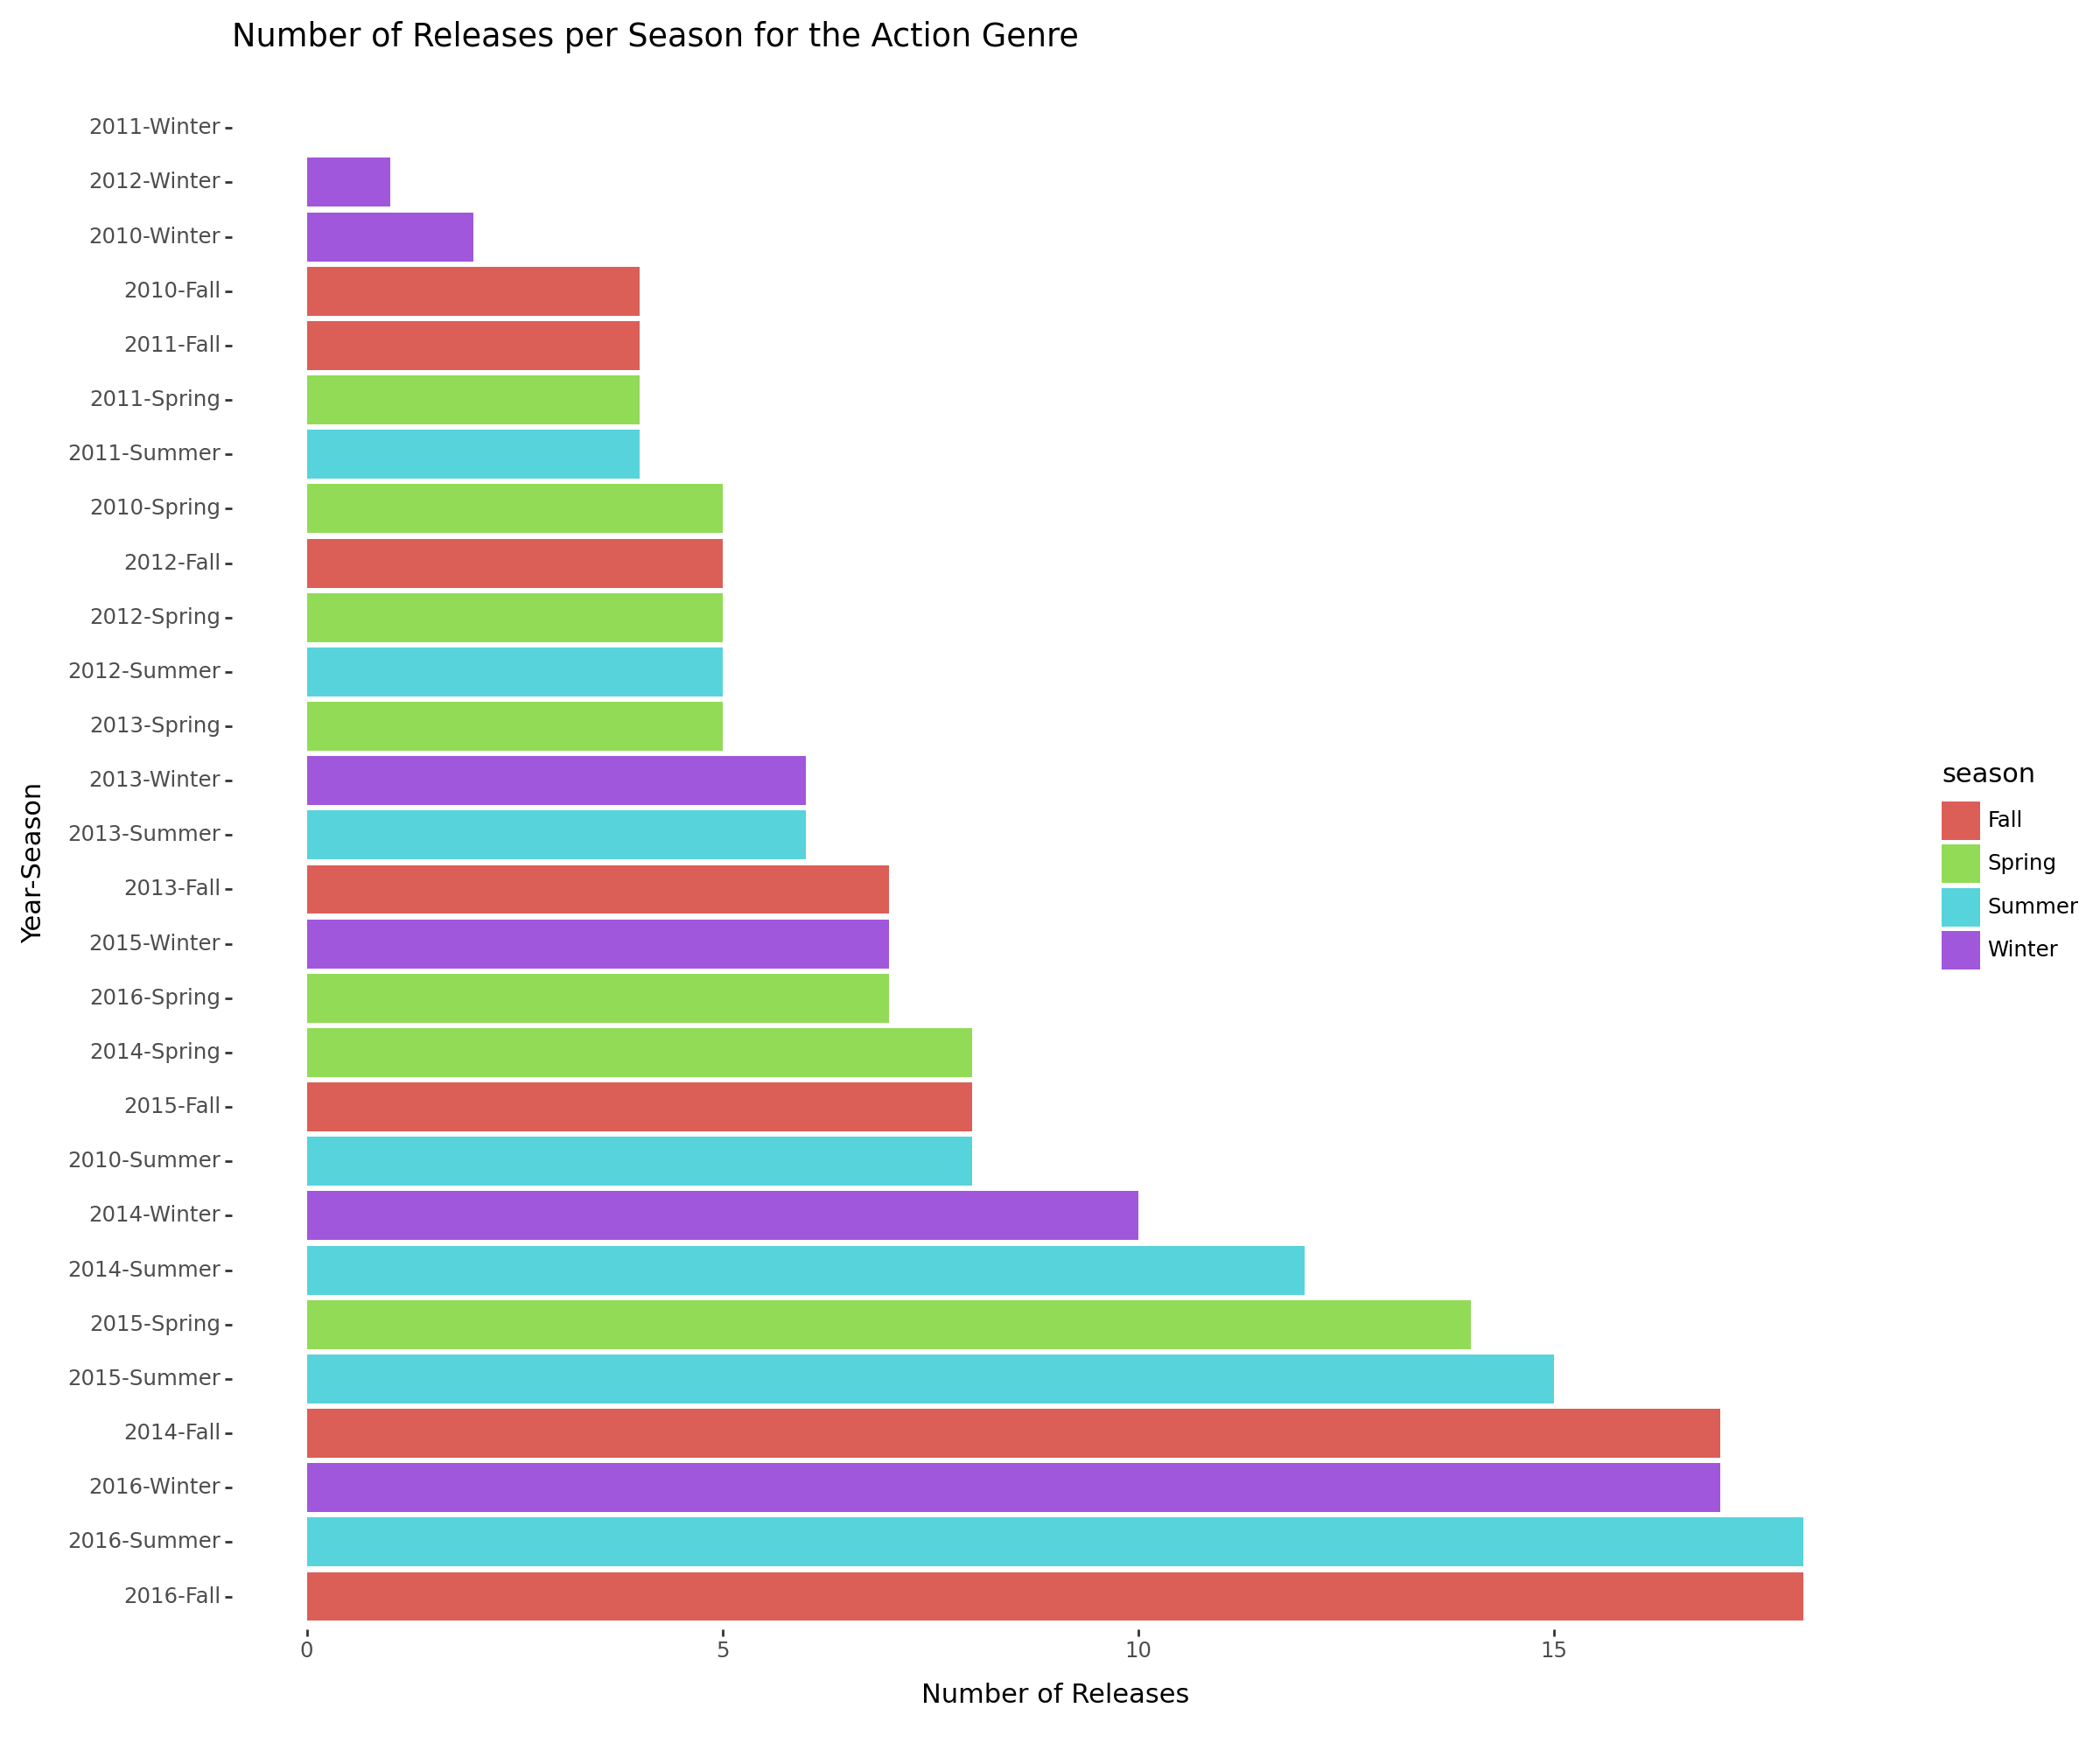

In [17]:
# Bar plot of the number of releases per season (4 seasons) for every year in 2000-2016
# for all the genres

df_filtered_movies = df_main[df_main["release_year"] >= 2010]
df_filtered_movies = df_filtered_movies[df_filtered_movies["release_year"] <= 2016]
df_filtered_movies = df_filtered_movies[["id", "title", "season", "release_year"]]
df_filtered_movies = df_filtered_movies.groupby(["season", "release_year"]).agg({"id": "count"}).reset_index()
df_filtered_movies = df_filtered_movies.rename(columns={"id": "num_releases"})
df_filtered_movies = df_filtered_movies.sort_values(by=["release_year", "season"], ascending=True)
df_filtered_movies["label"] = df_filtered_movies["release_year"].astype(str) + "-" + df_filtered_movies["season"]


print(df_filtered_movies.columns)

# add winter-2011 to show that there were no movies then
df_filtered_movies.loc[len(df_filtered_movies)] = ["Winter", 2011, 0, "2011-Winter"]

p = (
    p9.ggplot(
        df_filtered_movies,
        p9.aes("reorder(label, -num_releases)", "num_releases", fill="season"),
    )
    # flip coords
    + p9.coord_flip()
    + p9.geom_bar(stat="identity")
    + p9.labs(
        x="Year-Season",
        y="Number of Releases",
        title="Number of Releases per Season for the Action Genre",
    )
    + p9.theme(
        figure_size=(12, 10),

        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#ffffff", size=0.5),
    )
)

p.draw()


In [18]:
# List all movies in winter 2011
df_winter_2011 = df_main[(df_main["release_year"] == 2011) & (df_main["season"] == "winter")]
df_winter_2011 = df_winter_2011.sort_values(by="popularity", ascending=False)
df_winter_2011


,budget,genres,id,original_language,popularity,production_companies,production_countries,revenue,runtime,title,...,vote_count,release_year,release_month,release_day,release_quarter,season,main_genre,genre_count,keywords,main_company


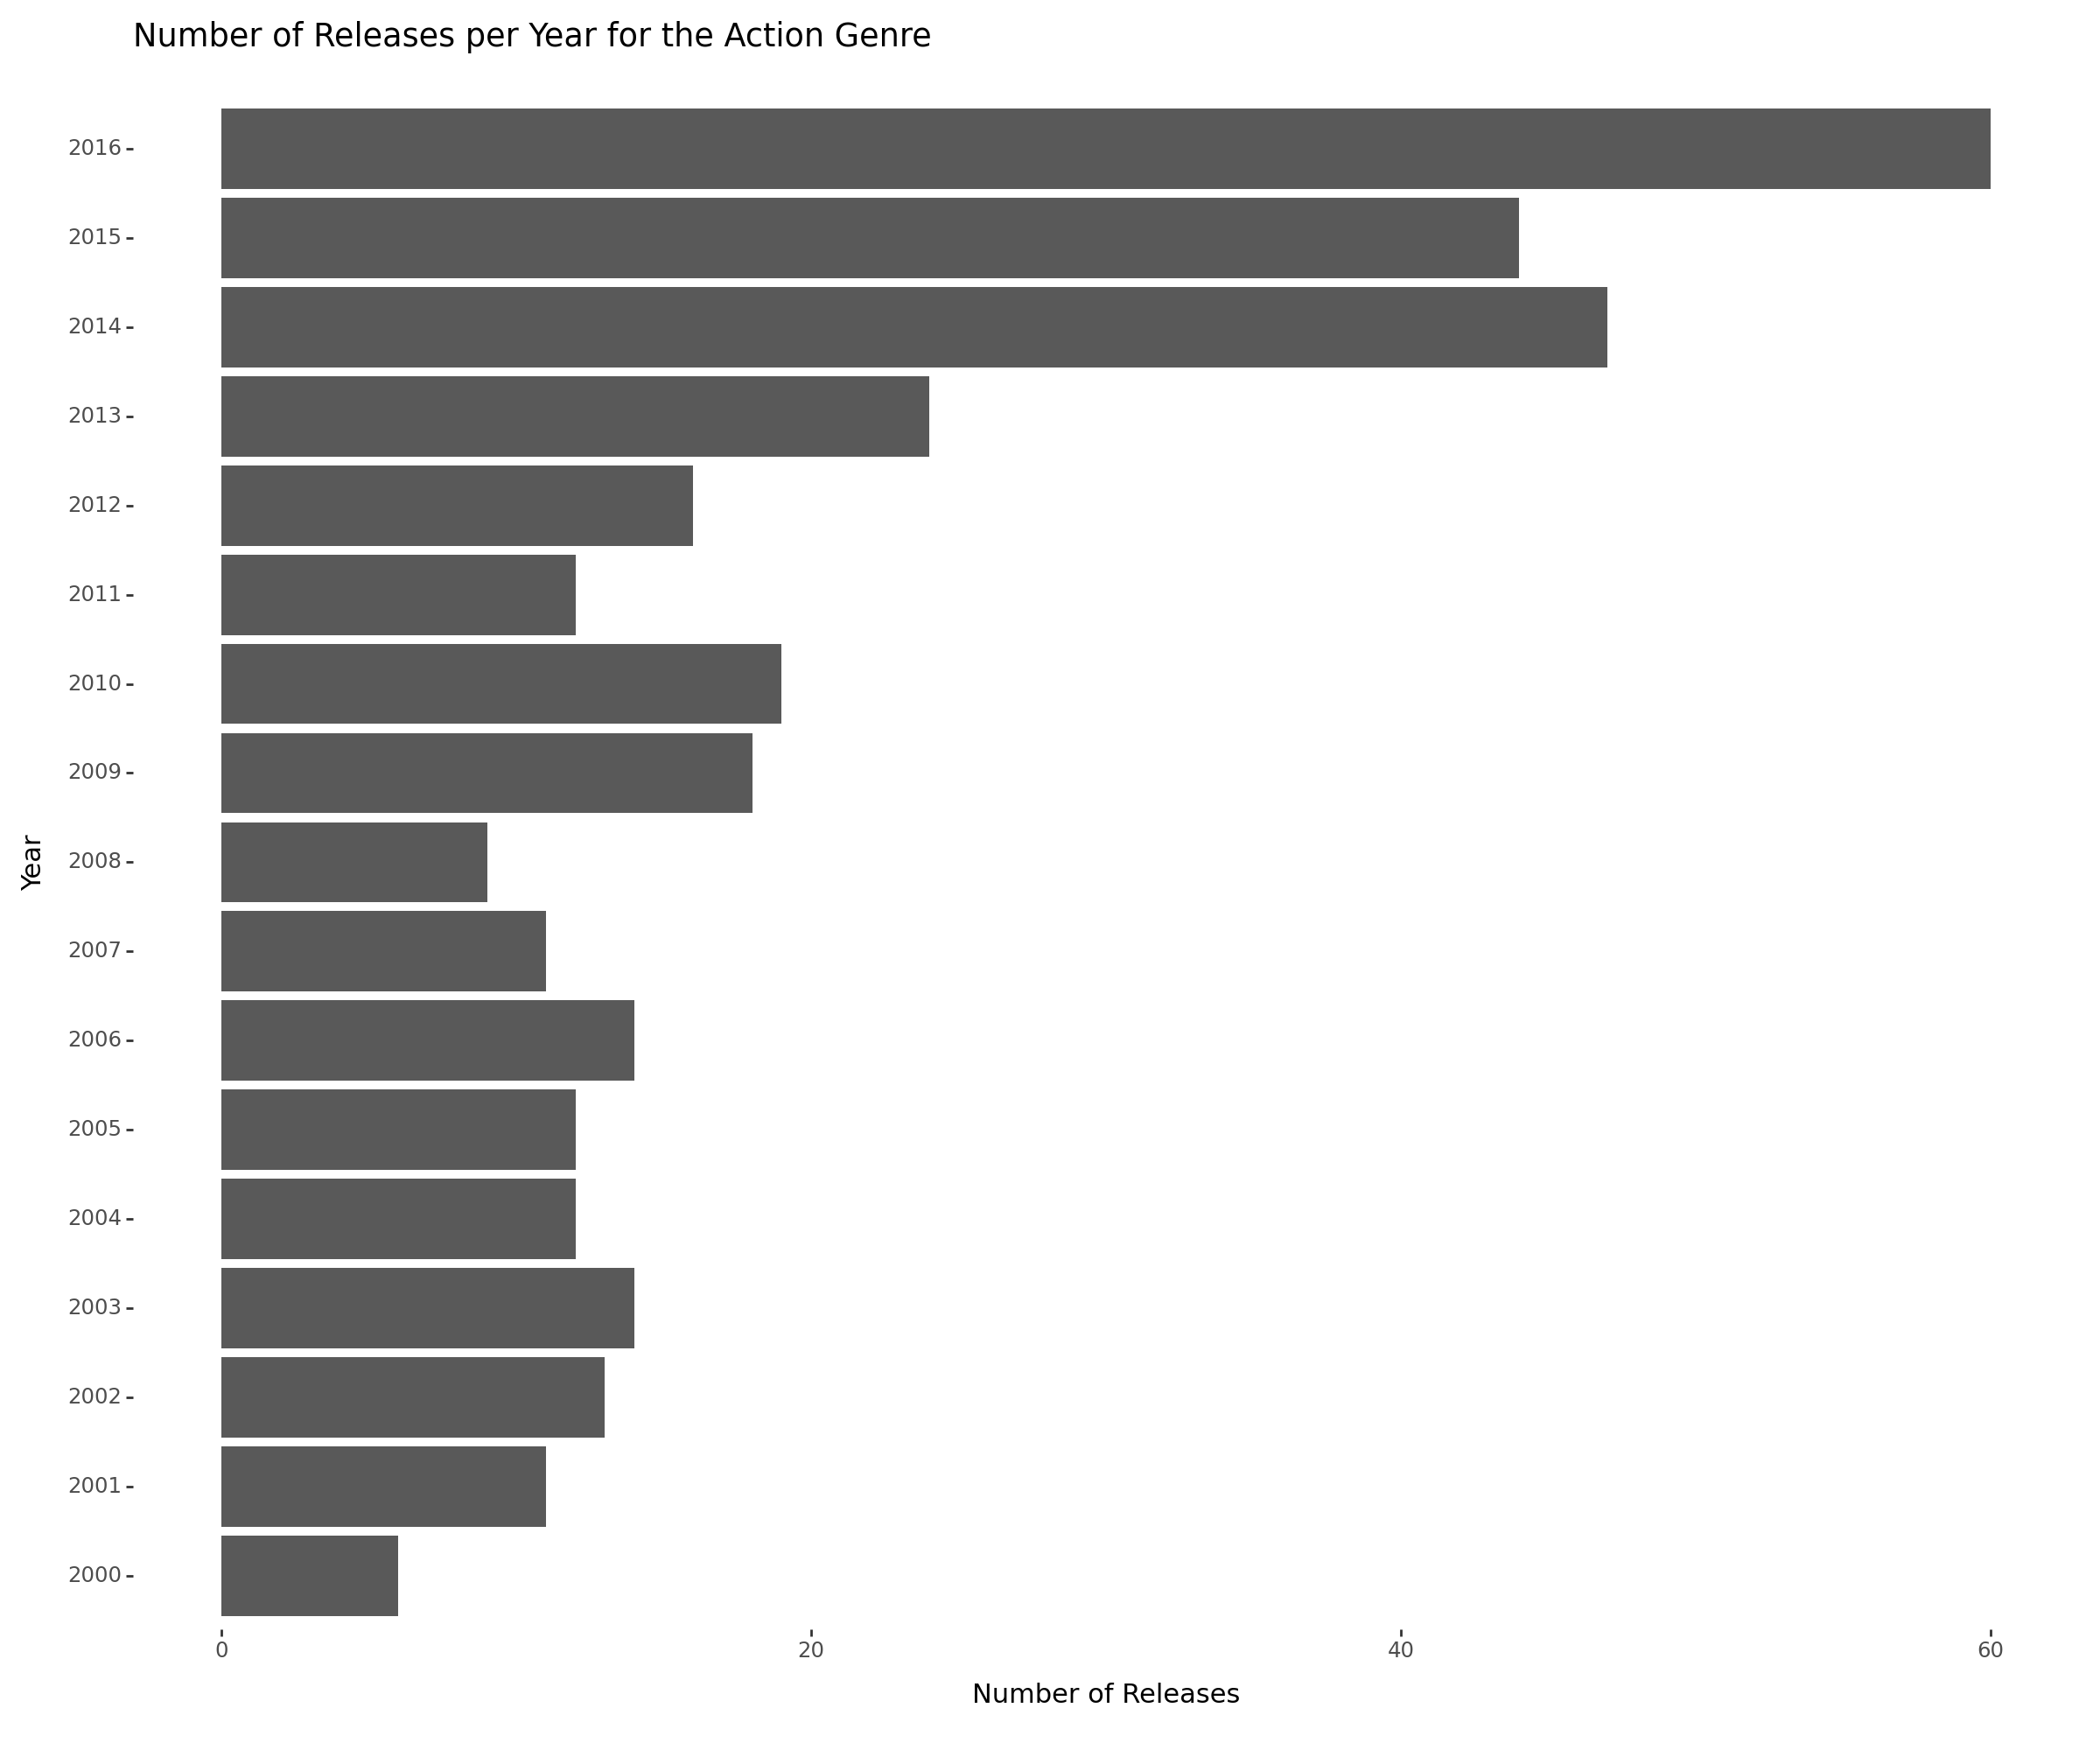

In [19]:
# Count of the movie per year
df_filtered_movies = df_main[["id", "title", "release_year"]]
# 2000-2016
df_filtered_movies = df_filtered_movies[df_filtered_movies["release_year"] >= 2000]
df_filtered_movies = df_filtered_movies[df_filtered_movies["release_year"] <= 2016]

df_filtered_movies = df_filtered_movies.groupby(["release_year"]).agg({"id": "count"}).reset_index()
df_filtered_movies = df_filtered_movies.rename(columns={"id": "num_releases"})
df_filtered_movies = df_filtered_movies.sort_values(by=["release_year"], ascending=True)
df_filtered_movies["label"] = df_filtered_movies["release_year"].astype(str)

p = (
    p9.ggplot(
        df_filtered_movies,
        p9.aes("label", "num_releases"),
    )
    # flip coords
    + p9.coord_flip()
    + p9.geom_bar(stat="identity")
    + p9.labs(
        x="Year",
        y="Number of Releases",
        title="Number of Releases per Year for the Action Genre",
    )
    + p9.theme(
        figure_size=(12, 10),

        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#ffffff", size=0.5),
    )
)

p.draw()


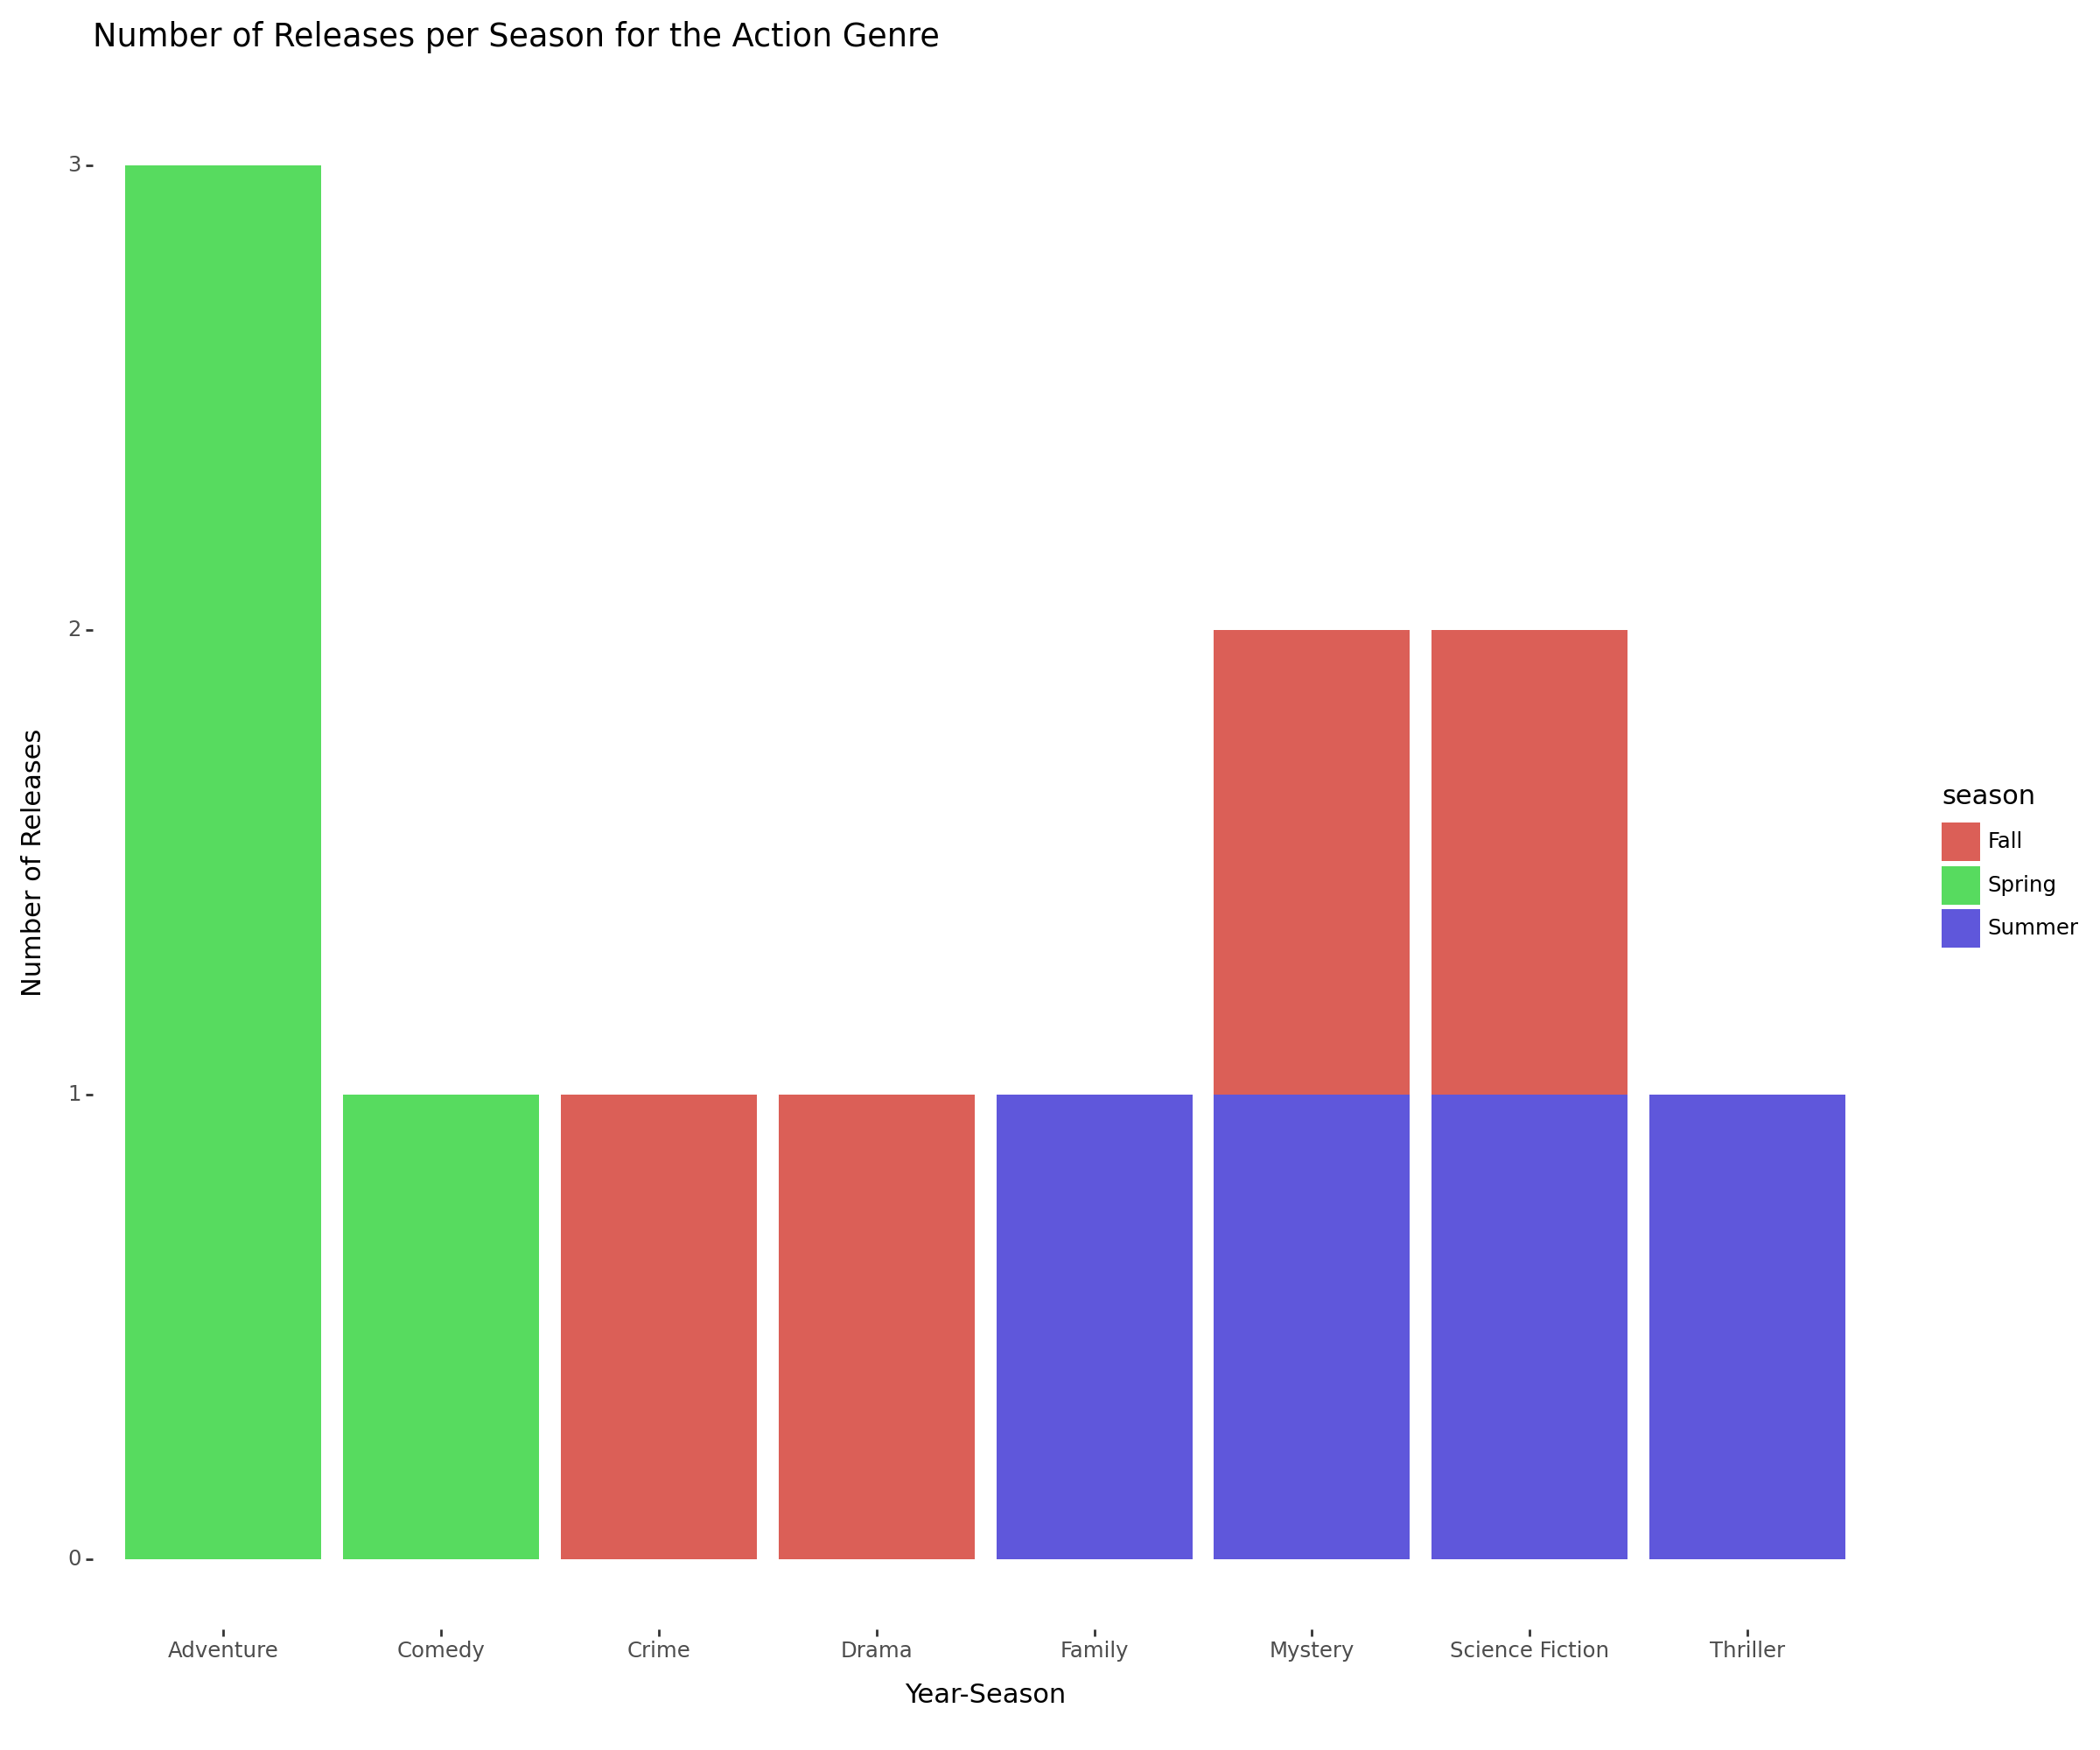

In [20]:
# Stacked bar plot of the number of releases per season (4 seasons) for every year in 2000-2016
# for all the genres

df_filtered_movies = df_main[df_main["release_year"] == 2011]
df_filtered_movies = df_filtered_movies[df_filtered_movies["release_year"] <= 2016]
df_filtered_movies = df_filtered_movies[["id", "title", "season", "release_year", "main_genre"]]
df_filtered_movies = df_filtered_movies.groupby(["season", "main_genre"]).agg({"id": "count"}).reset_index()
df_filtered_movies = df_filtered_movies.rename(columns={"id": "num_releases"})

p = (
    p9.ggplot(
        df_filtered_movies,
        p9.aes("main_genre", "num_releases", fill="season"),
    )
    + p9.geom_col(stat="identity")
    + p9.labs(
        x="Year-Season",
        y="Number of Releases",
        title="Number of Releases per Season for the Action Genre",
    )
    + p9.theme(
        figure_size=(12, 10),

        panel_background=p9.element_rect(fill="white"),
        panel_grid_major=p9.element_line(color="#ffffff", size=0.5),
    )
)

p.draw()
